In [19]:
import numpy as np
import pandas as pd
import sqlite3
import requests
import matplotlib.pyplot as plt
import pubchempy as pcp

In [2]:
subacute_up_gene_np = pd.read_csv("/data1/project/eunyi/tbi/0.subacute_up_gene_np.csv")
subacute_down_gene_np = pd.read_csv("/data1/project/eunyi/tbi/0.subacute_down_gene_np.csv")
acute_up_gene_np = pd.read_csv("/data1/project/eunyi/tbi/0.acute_up_gene_np.csv")
acute_down_gene_np = pd.read_csv("/data1/project/eunyi/tbi/0.acute_down_gene_np.csv")
drug_target_info = pd.read_csv('drug_target_info.tsv', sep='\t')

## NetGP에 있는 drug target info 활용

In [3]:
drug_target_info

,gene_name,drug_id,drug_name,Target pathway
0,ABL1,DB00619,Imatinib,NaN
1,ABL1,DB01254,Dasatinib,NaN
2,ABL1,DB04868,Nilotinib,NaN
3,ABL1,DB06616,Bosutinib,NaN
4,ABL1,DB08901,Ponatinib,NaN
...,...,...,...,...
614,PORCN,NaN,Wnt-C59,WNT signaling
615,TNKS2,NaN,XAV939,WNT signaling
616,PIKFYVE,NaN,YM201636,PI3K/MTOR signaling
617,AURKA,NaN,ZM447439,Mitosis


In [5]:
subacute_up_gene_np

,gene,np_score
0,Alox12,0.010011
1,Dbh,0.010009
2,Icam2,0.010074
3,Cyp51,0.010035
4,Nherf2,0.010118
...,...,...
76,Cebpd,0.010000
77,Tuba1a,0.010000
78,S100a16,0.010000
79,Selenom,0.010000


In [6]:
# gene_name과 gene의 대소문자 통일 및 공백 제거
subacute_up_gene_np['gene'] = subacute_up_gene_np['gene'].str.lower().str.strip()
drug_target_info['gene_name'] = drug_target_info['gene_name'].str.lower().str.strip()

# 두 파일을 gene_name과 gene을 기준으로 병합
merge_sub_up = pd.merge(subacute_up_gene_np, drug_target_info, left_on='gene', right_on='gene_name', how='inner')

# 필요한 칼럼만 선택 (gene, drug_name, np_score)
subacute_up_gene_drug_np = merge_sub_up[['gene', 'drug_name', 'np_score']]
subacute_up_gene_drug_np

,gene,drug_name,np_score
0,atox1,Cisplatin,0.01
1,tuba1a,Vinblastine,0.01


In [7]:
subacute_down_gene_np

,gene,np_score
0,S100a6,0.010069
1,Col1a1,0.010078
2,Cacna1e,0.010000
3,Cd44,0.010124
4,Fblim1,0.010000
5,Kif11,0.010000
6,Aldh1a2,0.010000
7,Hmmr,0.010044
8,Upp1,0.010000
9,Itgb3,0.010155


In [8]:
# gene_name과 gene의 대소문자 통일 및 공백 제거
subacute_down_gene_np['gene'] = subacute_down_gene_np['gene'].str.lower().str.strip()
drug_target_info['gene_name'] = drug_target_info['gene_name'].str.lower().str.strip()

# 두 파일을 gene_name과 gene을 기준으로 병합
merge_sub_down = pd.merge(subacute_down_gene_np, drug_target_info, left_on='gene', right_on='gene_name', how='inner')

# 필요한 칼럼만 선택 (gene, drug_name, np_score)
subacute_down_gene_drug_np = merge_sub_down[['gene', 'drug_name', 'np_score']]
subacute_down_gene_drug_np

,gene,drug_name,np_score
0,kif11,S-Trityl-L-cysteine,0.010000
1,aldh1a2,Tretinoin,0.010000
2,top2a,Teniposide,0.010000
3,top2a,Etoposide,0.010000
4,top2a,Doxorubicin,0.010000
5,top2a,Mitoxantrone,0.010000
6,top2a,Dactinomycin,0.010000
7,ptgs2,Lenalidomide,0.010001
8,ptgs2,Bryostatin 1,0.010001


In [10]:
acute_up_gene_np

,gene,np_score
0,Tpd52l1,0.010000
1,Alox12,0.010015
2,Sox9,0.010025
3,Trappc6a,0.010032
4,Ddb2,0.010000
...,...,...
73,Hba-a2,0.010028
74,Hba-a1,0.010000
75,Jund,0.010000
76,Ctsf,0.010000


In [11]:
# gene_name과 gene의 대소문자 통일 및 공백 제거
acute_up_gene_np['gene'] = acute_up_gene_np['gene'].str.lower().str.strip()
drug_target_info['gene_name'] = drug_target_info['gene_name'].str.lower().str.strip()

# 두 파일을 gene_name과 gene을 기준으로 병합
merge_a_up = pd.merge(acute_up_gene_np, drug_target_info, left_on='gene', right_on='gene_name', how='inner')

# 필요한 칼럼만 선택 (gene, drug_name, np_score)
acute_up_gene_drug_np = merge_a_up[['gene', 'drug_name', 'np_score']]
acute_up_gene_drug_np

,gene,drug_name,np_score


In [12]:
# gene_name과 gene의 대소문자 통일 및 공백 제거
acute_down_gene_np['gene'] = acute_down_gene_np['gene'].str.lower().str.strip()
drug_target_info['gene_name'] = drug_target_info['gene_name'].str.lower().str.strip()

# 두 파일을 gene_name과 gene을 기준으로 병합
merge_a_down = pd.merge(acute_down_gene_np, drug_target_info, left_on='gene', right_on='gene_name', how='inner')

# 필요한 칼럼만 선택 (gene, drug_name, np_score)
acute_down_gene_drug_np = merge_a_down[['gene', 'drug_name', 'np_score']]
acute_down_gene_drug_np

,gene,drug_name,np_score
0,kit,Sorafenib,0.010398
1,kit,Imatinib,0.010398
2,kit,Dasatinib,0.010398
3,kit,Sunitinib,0.010398
4,kit,Nilotinib,0.010398
5,kit,OSI-930,0.010398
6,kit,Linifanib,0.010398
7,kit,Pazopanib,0.010398
8,kit,Midostaurin,0.010398
9,kit,Ponatinib,0.010398


## chembl 활용

In [3]:
# 데이터베이스 연결 (압축 해제된 .db 파일 경로)
conn = sqlite3.connect('chembl_34/chembl_34_sqlite/chembl_34.db')

# 데이터베이스의 모든 테이블 목록 확인
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(tables_query, conn)

# 테이블 목록 출력
print(tables)

                         name
0                 action_type
1                  assay_type
2            chembl_id_lookup
3     confidence_score_lookup
4             curation_lookup
..                        ...
75             mechanism_refs
76            metabolism_refs
77  predicted_binding_domains
78               warning_refs
79               sqlite_stat1

[80 rows x 1 columns]


In [4]:
# 테이블 목록을 한 줄로 출력
table_names = tables['name'].tolist()
print(table_names)


['action_type', 'assay_type', 'chembl_id_lookup', 'confidence_score_lookup', 'curation_lookup', 'chembl_release', 'source', 'relationship_type', 'target_type', 'variant_sequences', 'bioassay_ontology', 'data_validity_lookup', 'activity_smid', 'activity_stds_lookup', 'assay_classification', 'atc_classification', 'bio_component_sequences', 'component_sequences', 'protein_classification', 'domains', 'go_classification', 'structural_alert_sets', 'products', 'frac_classification', 'hrac_classification', 'irac_classification', 'research_stem', 'organism_class', 'patent_use_codes', 'usan_stems', 'version', 'cell_dictionary', 'docs', 'target_dictionary', 'tissue_dictionary', 'molecule_dictionary', 'activity_supp', 'component_class', 'component_domains', 'component_go', 'component_synonyms', 'structural_alerts', 'defined_daily_dose', 'product_patents', 'protein_class_synonyms', 'research_companies', 'assays', 'compound_records', 'binding_sites', 'biotherapeutics', 'compound_properties', 'compou

In [5]:
# 각 테이블의 구조 확인
table_names = ['target_dictionary', 'component_sequences', 'binding_sites', 'molecule_dictionary']

for table_name in table_names:
    columns_query = f"PRAGMA table_info({table_name});"
    columns = pd.read_sql(columns_query, conn)
    print(f"Table: {table_name}")
    print(columns)
    print("\n")


Table: target_dictionary
   cid                name          type  notnull dflt_value  pk
0    0                 tid        BIGINT        1       None   1
1    1         target_type   VARCHAR(30)        0       None   0
2    2           pref_name  VARCHAR(200)        1       None   0
3    3              tax_id        BIGINT        0       None   0
4    4            organism  VARCHAR(150)        0       None   0
5    5           chembl_id   VARCHAR(20)        1       None   0
6    6  species_group_flag      SMALLINT        1       None   0


Table: component_sequences
   cid             name          type  notnull dflt_value  pk
0    0     component_id        BIGINT        1       None   1
1    1   component_type   VARCHAR(50)        0       None   0
2    2        accession   VARCHAR(25)        0       None   0
3    3         sequence          TEXT        0       None   0
4    4  sequence_md5sum   VARCHAR(32)        0       None   0
5    5      description  VARCHAR(200)        0       N

In [13]:
query = "SELECT * FROM target_dictionary LIMIT 5"
target_data = pd.read_sql(query, conn)
print(target_data)


   tid     target_type                                          pref_name  \
0    1  SINGLE PROTEIN                               Maltase-glucoamylase   
1    2  SINGLE PROTEIN                            Sulfonylurea receptor 2   
2    3  SINGLE PROTEIN                               Phosphodiesterase 5A   
3    4  SINGLE PROTEIN  Voltage-gated T-type calcium channel alpha-1H ...   
4    5  SINGLE PROTEIN     Nicotinic acetylcholine receptor alpha subunit   

   tax_id      organism   chembl_id  species_group_flag  
0    9606  Homo sapiens  CHEMBL2074                   0  
1    9606  Homo sapiens  CHEMBL1971                   0  
2    9606  Homo sapiens  CHEMBL1827                   0  
3    9606  Homo sapiens  CHEMBL1859                   0  
4    6253  Ascaris suum  CHEMBL1884                   0  


In [14]:
query = "SELECT * FROM binding_sites LIMIT 5"
binding_sites_data = pd.read_sql(query, conn)
print(binding_sites_data)


   site_id                                          site_name     tid
0        2     UDP-glucuronosyltransferase 1-10, UDPGT domain  104088
1        3  Mitogen-activated protein kinase 8, Pkinase do...  104254
2        4  Inosine-5'-monophosphate dehydrogenase 1, IMPD...      84
3        5                 Dopamine D1 receptor, 7tm_1 domain      88
4        6                     GABA transporter 1, SNF domain     113


In [15]:
query = "SELECT * FROM component_sequences LIMIT 5"
component_sequences_data = pd.read_sql(query, conn)
print(component_sequences_data)


   component_id component_type accession  \
0             1        PROTEIN    O09028   
1             2        PROTEIN    P02708   
2             3        PROTEIN    P04637   
3             4        PROTEIN    P04757   
4             5        PROTEIN    P05106   

                                            sequence  \
0  MSYSLYLAFVCLNLLAQRMCIQGNQFNVEVSRSDKLSLPGFENLTA...   
1  MEPWPLLLLFSLCSAGLVLGSEHETRLVAKLFKDYSSVVRPVEDHR...   
2  MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...   
3  MGVVLLPPPLSMLMLVLMLLPAASASEAEHRLFQYLFEDYNEIIRP...   
4  MRARPRPRPLWATVLALGALAGVGVGGPNICTTRGVSSCQQCLAVS...   

                    sequence_md5sum  \
0  7473be17a767c25bb1d57beee67ffff7   
1  c55fcab2ffecb6bac66c25960ddfe057   
2  c133dfce69f606f20865e9008199f852   
3  bc02b60e99a48d661f5cf356aa17ba81   
4  e3bf58cfa4245d3c4fb974a14d27d975   

                                       description  tax_id           organism  \
0      Gamma-aminobutyric acid receptor subunit pi   10116  Rattus norvegicus   
1

In [16]:
query = "SELECT * FROM molecule_dictionary LIMIT 5"
molecule_data = pd.read_sql(query, conn)
print(molecule_data)


   molregno pref_name     chembl_id max_phase  therapeutic_flag  \
0         1      None    CHEMBL6329      None                 0   
1         2      None    CHEMBL6328      None                 0   
2         3      None  CHEMBL265667      None                 0   
3         4      None    CHEMBL6362      None                 0   
4         5      None  CHEMBL267864      None                 0   

   dosed_ingredient structure_type chebi_par_id   molecule_type  \
0                 0            MOL         None  Small molecule   
1                 0            MOL         None  Small molecule   
2                 0            MOL         None  Small molecule   
3                 0            MOL         None  Small molecule   
4                 0            MOL         None  Small molecule   

  first_approval  ...  usan_year  availability_type  usan_stem  polymer_flag  \
0           None  ...       None                 -1       None             0   
1           None  ...       None  

In [6]:
# 압축 해제된 .db 파일 경로
db_path = 'chembl_34/chembl_34_sqlite/chembl_34.db'  # 디렉토리 내 .db 파일 경로

# SQLite 데이터베이스 연결
conn = sqlite3.connect(db_path)

# 테이블 목록 확인 쿼리
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(tables_query, conn)

# 테이블 목록 출력
print(tables)

# 원하는 데이터 추출 예시
query = """
SELECT
    md.chembl_id AS drug_chembl_id,
    md.pref_name AS drug_name,
    td.pref_name AS target_name,
    cs.accession AS gene_accession
FROM
    target_dictionary td
JOIN
    binding_sites bs ON td.tid = bs.tid
JOIN
    component_sequences cs ON bs.site_id = cs.component_id
JOIN
    molecule_dictionary md ON bs.site_id = md.molregno
"""

# 쿼리 실행
drug_target_df = pd.read_sql(query, conn)
print(drug_target_df.head())


                         name
0                 action_type
1                  assay_type
2            chembl_id_lookup
3     confidence_score_lookup
4             curation_lookup
..                        ...
75             mechanism_refs
76            metabolism_refs
77  predicted_binding_domains
78               warning_refs
79               sqlite_stat1

[80 rows x 1 columns]
  drug_chembl_id drug_name                               target_name  \
0     CHEMBL6328      None          UDP-glucuronosyltransferase 1-10   
1   CHEMBL265667      None        Mitogen-activated protein kinase 8   
2     CHEMBL6362      None  Inosine-5'-monophosphate dehydrogenase 1   
3   CHEMBL267864      None                      Dopamine D1 receptor   
4     CHEMBL6363      None                        GABA transporter 1   

  gene_accession  
0         P02708  
1         P04637  
2         P04757  
3         P05106  
4         P05556  


In [7]:
drug_target_df

,drug_chembl_id,drug_name,target_name,gene_accession
0,CHEMBL6328,None,UDP-glucuronosyltransferase 1-10,P02708
1,CHEMBL265667,None,Mitogen-activated protein kinase 8,P04637
2,CHEMBL6362,None,Inosine-5'-monophosphate dehydrogenase 1,P04757
3,CHEMBL267864,None,Dopamine D1 receptor,P05106
4,CHEMBL6363,None,GABA transporter 1,P05556
...,...,...,...,...
2993,CHEMBL276772,None,Phosphodiesterase,Q56AP7
2994,CHEMBL17687,None,C5a anaphylatoxin chemotactic receptor 2,Q9Z0K8
2995,CHEMBL277375,None,C5a anaphylatoxin chemotactic receptor 2,O14986
2996,CHEMBL17349,None,Mesoderm-specific transcript homolog protein,F1LY25


In [8]:
# UniProt ID Mapping 함수 정의
def map_uniprot_to_gene_name(accession_ids):
    url = "https://rest.uniprot.org/idmapping/run"
    params = {
        'from': 'UniProtKB_AC-ID',  # UniProt Accession to Gene Name
        'to': 'Gene_Name',
        'ids': ','.join(accession_ids)
    }

    # UniProt API에 POST 요청
    response = requests.post(url, data=params)
    response_data = response.json()

    # 응답 출력
    print("Initial API response:", response_data)

    job_id = response_data.get('jobId')
    if not job_id:
        raise Exception("No jobId found in the API response")

    # 작업 상태 확인 및 결과 가져오기
    status_url = f"https://rest.uniprot.org/idmapping/status/{job_id}"
    while True:
        status_response = requests.get(status_url)
        status_data = status_response.json()

        # 결과가 바로 있으면 상태 확인을 건너뜀
        if 'results' in status_data:
            print("Results found directly in status response")
            result_data = status_data['results']
            break

        # 예상된 상태 코드 처리
        if 'jobStatus' in status_data and status_data['jobStatus'] == 'FINISHED':
            # 결과 가져오기
            result_url = f"https://rest.uniprot.org/idmapping/results/{job_id}"
            result_response = requests.get(result_url)
            result_data = result_response.json()['results']
            break
        elif 'jobStatus' in status_data and status_data['jobStatus'] in ('NEW', 'RUNNING'):
            continue
        else:
            raise Exception(f"Unexpected job status: {status_data}")

    # 'from' (accession)과 'to' (gene_name) 정보 추출
    mapped_data = {entry['from']: entry['to'] for entry in result_data}
    return mapped_data

# drug_target_df에서 None이 아닌 gene_accession 리스트 추출
accession_ids = drug_target_df['gene_accession'].dropna().unique()

# UniProt API를 통해 gene_accession에 맞는 gene name 매핑
gene_name_mapping = map_uniprot_to_gene_name([acc for acc in accession_ids if isinstance(acc, str)])

# drug_target_df에 gene_name 열 추가
drug_target_df['gene_name'] = drug_target_df['gene_accession'].map(gene_name_mapping)

# 결과 확인
print(drug_target_df.head())


Initial API response: {'jobId': 'ae9f697ddde367a89ef054eb404fcd04b580da0f'}
Results found directly in status response
  drug_chembl_id drug_name                               target_name  \
0     CHEMBL6328      None          UDP-glucuronosyltransferase 1-10   
1   CHEMBL265667      None        Mitogen-activated protein kinase 8   
2     CHEMBL6362      None  Inosine-5'-monophosphate dehydrogenase 1   
3   CHEMBL267864      None                      Dopamine D1 receptor   
4     CHEMBL6363      None                        GABA transporter 1   

  gene_accession gene_name  
0         P02708    CHRNA1  
1         P04637      TP53  
2         P04757    Chrna3  
3         P05106     ITGB3  
4         P05556     ITGB1  


In [11]:
# 매핑되지 않은 gene_accession을 확인
unmapped_accessions = drug_target_df[drug_target_df['gene_name'].isna()]['gene_accession']

# 다시 한번 작은 그룹으로 나눠서 매핑 시도
for accession_group in np.array_split(unmapped_accessions, 10):  # 10개의 작은 그룹으로 나눔
    gene_name_mapping = map_uniprot_to_gene_name([acc for acc in accession_group if isinstance(acc, str)])
    drug_target_df['gene_name'].update(drug_target_df['gene_accession'].map(gene_name_mapping))


/data1/project/eunyi/envs/anaconda3/envs/deseq/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Initial API response: {'jobId': 'b0848c88ad7b5e116dcb3a635b196366aef11678'}
Results found directly in status response


/tmp/ipykernel_2295665/3097537642.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drug_target_df['gene_name'].update(drug_target_df['gene_accession'].map(gene_name_mapping))


Initial API response: {'jobId': '2f36d19c379e8bbf89f44bdc3af005a8dee0dd08'}
Results found directly in status response
Initial API response: {'jobId': 'b83b79a73b5c83c8a20c67562d9aeda71fd2c2a6'}
Results found directly in status response
Initial API response: {'jobId': '657cf02dc0b977ec5e46969005708cf93e34d894'}
Results found directly in status response
Initial API response: {'jobId': '33ee8f6eda858ced6a1e446c44c745daaec9c493'}
Results found directly in status response
Initial API response: {'jobId': '6b192725932bf235718609778e6ade3aa6fc0a18'}
Results found directly in status response
Initial API response: {'jobId': 'ada9e1ab79bd24041203816273fff8d6c790bf11'}
Results found directly in status response
Initial API response: {'jobId': '01982750d0bc57474b71c57c3ad02ce7cf8084ff'}
Results found directly in status response
Initial API response: {'jobId': '00cf00086c99f14ca76e655afec9c64dbe5d1807'}
Results found directly in status response
Initial API response: {'jobId': 'd83cd5cc7473d698ba3c1ca

In [26]:
drug_target_df.to_csv("/data1/project/eunyi/tbi/drug_gene/chembl_drug_gene.csv", index=False)
drug_target_df

,drug_chembl_id,drug_name,target_name,gene_accession,gene_name
0,CHEMBL6328,None,UDP-glucuronosyltransferase 1-10,P02708,CHRNA1
1,CHEMBL265667,None,Mitogen-activated protein kinase 8,P04637,TP53
2,CHEMBL6362,None,Inosine-5'-monophosphate dehydrogenase 1,P04757,Chrna3
3,CHEMBL267864,None,Dopamine D1 receptor,P05106,ITGB3
4,CHEMBL6363,None,GABA transporter 1,P05556,ITGB1
...,...,...,...,...,...
2993,CHEMBL276772,None,Phosphodiesterase,Q56AP7,NaN
2994,CHEMBL17687,None,C5a anaphylatoxin chemotactic receptor 2,Q9Z0K8,NaN
2995,CHEMBL277375,None,C5a anaphylatoxin chemotactic receptor 2,O14986,NaN
2996,CHEMBL17349,None,Mesoderm-specific transcript homolog protein,F1LY25,NaN


In [27]:
# Filtering the rows where drug_name is not None
non_none_drug_names_df = drug_target_df[drug_target_df['drug_name'].notna()]

# Counting the number of rows with non-None drug_name
non_none_drug_names_count = non_none_drug_names_df.shape[0]

# Extracting the unique drug names
unique_drug_names = non_none_drug_names_df['drug_name'].unique()

# Displaying the result
print("Number of rows with non-None drug_name:", non_none_drug_names_count)
print("Unique drug names:")
print(unique_drug_names)


Number of rows with non-None drug_name: 275
Unique drug names:
['BROMOENOL LACTONE' 'UCL-1530' 'PRAZOSIN' 'ZOMEPIRAC SODIUM'
 'ALPHA-BUNGAROTOXIN' 'NICOTINE' 'SCR01020' 'OFLOXACIN' 'NALIDIXIC ACID'
 'ELLAGIC ACID' 'DARAPLADIB' 'PMS-601' 'INDOMETHACIN' 'SULBACTAM'
 'SC-58272' 'DIFLOXACIN' 'FLEROXACIN' 'BISINDOLYLMALEIMIDE IX'
 'MERAFLOXACIN' 'PD-117558' 'AMIFLOXACIN' 'CIPROFLOXACIN' 'NORFLOXACIN'
 'SB-203580' 'SB-431542' 'HARMINE' 'PNU-22394' 'TRYPTOLINE'
 '4-METHYLTHIOAMPHETAMINE' 'TRYPTAMINE' 'CGS-19281A' 'BMS-182874'
 'IDOXIFENE' 'p-IODOAMPHETAMINE' 'AMPHETAMINE' 'ISOSORBIDE DINITRATE'
 'MIANSERIN' 'TENAMFETAMINE' 'IMIPRAMINE' 'INDAPAMIDE'
 "(2,2':6',2''-terpyridine)platinum (II) complex" 'Ro-151310' 'FLUMAZENIL'
 'TROGLITAZONE' 'WIN-54954' 'EPIBATIDINE' 'Platinum complex'
 'DIMETHYLSTILBESTROL' 'BICALUTAMIDE' 'DIAZEPAM' 'DUP-721' 'Ro-154513'
 'ENISOPROST' 'METOPROLOL' 'ZIDAPAMIDE' 'ALPRENOLOL'
 "4'-substituted 2,2':6,2''-Terpyridineplatinum (II) Picoline complex"
 'DIMECAMINE' 'SHET

In [20]:
# 테이블 목록을 한 줄로 출력
subacute_up_gene_np_names = subacute_up_gene_np['gene'].tolist()
print(subacute_up_gene_np_names)

['Alox12', 'Dbh', 'Icam2', 'Cyp51', 'Nherf2', 'Timmdc1', 'Bcam', 'Fcgrt', 'Rps11', 'Slc4a1', 'Bcl2l1', 'Rplp1', 'Dynll1', 'Srp14', 'Rpl15', 'Dnajb9', 'Ppp1cb', 'Med28', 'Atox1', 'Fis1', 'Ptprr', 'Id2', 'Vti1b', 'Degs2', 'Marveld2', 'Srebf2', 'Hes1', 'Atf1', 'Mospd1', 'Bsg', 'Banf1', 'Alas2', 'Ube3a', 'Hprt1', 'Higd2a', 'Snca', 'Ube2l6', 'Cst3', 'Edn3', 'Map1lc3a', 'Rnf11', 'Arpc3', 'Mfge8', 'Ndufc2', 'Msmo1', 'Map1lc3b', 'Gng11', 'Mgll', 'Ppp3r1', 'Dhcr24', 'Eif1', 'Isg15', 'Ephx1', 'Bpgm', 'Blvrb', 'Cldn5', 'Selenow', 'Cox6a1', 'Selenok', 'Uqcrq', 'Cd24a', 'Vamp8', 'Gypa', 'Rap1b', 'Dsp', 'Gstm1', 'Dhcr7', 'Ptp4a3', 'Pop5', 'Gpx1', 'ND6', 'Lsm14a', 'Myl9', 'Hba-a2', 'Hba-a1', 'Jund', 'Cebpd', 'Tuba1a', 'S100a16', 'Selenom', 'Ly6c1']


## TTD 활용

In [10]:
import pandas as pd

# 잘못된 행을 건너뛰도록 설정 (경고 없이 건너뛰기)
file_path = 'P1-01-TTD_target_download.txt'
ttd_target = pd.read_csv(file_path, sep='\t', header=None, on_bad_lines='skip')
print(ttd_target.head())
ttd_target

                                                   0
0  TTD - Therapeutic Targets Database Full Data D...
1      Title - TTD targets information in raw format
2                       Version 10.1.01 (2024.01.10)
3  Provided by IDRB   Lab of Innovative Drug Reas...
4                     College of Pharmaceutical S...


,0
0,TTD - Therapeutic Targets Database Full Data D...
1,Title - TTD targets information in raw format
2,Version 10.1.01 (2024.01.10)
3,Provided by IDRB Lab of Innovative Drug Reas...
4,College of Pharmaceutical S...
5,Zhejiang University
6,https://idrblab.org/
7,Provided by BIDD BioInformatic and Drug Desi...
8,Department of Pharmacy
9,National Unviersity of Sing...


In [12]:
import pandas as pd

# 잘못된 줄을 건너뛰도록 설정 (on_bad_lines='skip')
file_path = 'P1-01-TTD_target_download.txt'
ttd_target = pd.read_csv(file_path, sep='\t', header=None, skiprows=16, engine='python', on_bad_lines='skip')

# 데이터 확인
print(ttd_target.head())


                                                   0
0                                     Abbreviations:
1  ----------------------------------------------...


In [14]:
import pandas as pd

# 잘못된 줄을 건너뛰도록 설정 (on_bad_lines='skip')
file_path = 'P1-01-TTD_target_download.txt'
ttd_target = pd.read_csv(file_path, sep='\t', header=None, skiprows=16, engine='python', on_bad_lines='skip')

# 데이터 확인
print(ttd_target.head())

# 1. 특정 패턴을 포함한 행 제거 (예: 구분선이나 메타데이터 부분)
ttd_target = ttd_target[~ttd_target[0].str.contains('Abbreviations|----', na=False)]

# 2. 공백 또는 비어 있는 행 제거
ttd_target = ttd_target.dropna()

# 정제된 데이터 확인
print(ttd_target.head())


                                                   0
0                                     Abbreviations:
1  ----------------------------------------------...
Empty DataFrame
Columns: [0]
Index: []


## TDC 활용

In [3]:
from tdc.multi_pred import DTI
data = DTI(name = 'BindingDB_IC50')

Downloading...
100%|██████████| 839M/839M [02:03<00:00, 6.80MiB/s]   
Loading...
Done!


In [2]:
tdc_data = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/data/bindingdb_ic50.csv")
tdc_data
# BindingDB_IC50
# ID1 : PubChem CID -> drug name
# ID2 : UniprotKB accession -> gene name
# Y : Binding affinity

,ID1,X1,ID2,X2,Y
0,71463198.0,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0
1,44640149.0,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9
2,65023.0,CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,8.5
3,461984.0,CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,177.0
4,461988.0,COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,164.0
...,...,...,...,...,...
1072926,76336413.0,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0
1072927,76311049.0,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0
1072928,76321936.0,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0
1072929,76329133.0,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0


In [4]:
# ID1을 정수형으로 변환
tdc_data['ID1'] = tdc_data['ID1'].astype('Int64')

# 변환된 결과 확인
print(tdc_data.head())
tdc_data = tdc_data

        ID1                                                 X1     ID2  \
0  71463198  Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...  P08684   
1  44640149  O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...  P51570   
2     65023  CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...     NaN   
3    461984  CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...     NaN   
4    461988  COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...     NaN   

                                                  X2        Y  
0  MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...  50000.0  
1  MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...   6676.9  
2  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...      8.5  
3  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...    177.0  
4  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...    164.0  


In [11]:
# 추출된 gene_mapping.dat 파일을 읽기
gene_mapping = pd.read_csv('gene_mapping.dat', sep='\t', header=None)

# 필요한 열 선택 (예: 0번 열: UniProt ID, 2번 열: Gene Name)
gene_mapping = gene_mapping[[0, 2]]  # UniProt ID와 Gene Name 열만 남김
gene_mapping.columns = ['ID2', 'gene']  # 열 이름 설정

# 결과 확인
print(gene_mapping.head())

      ID2        gene
0  Q60888     Or10d1b
1  Q8VBW9     Or10h28
2  Q6V4H0       10HGO
3  Q60885     Or10p22
4  A9JLI2  MGF 110-1L


In [16]:
# tdc_data와 병합
merged_data = pd.merge(tdc_data, gene_mapping, on='ID2', how='left')

# 병합된 데이터 확인
print(merged_data.head())

        ID1                                                 X1     ID2  \
0  71463198  Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...  P08684   
1  44640149  O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...  P51570   
2     65023  CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...     NaN   
3    461984  CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...     NaN   
4    461988  COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...     NaN   

                                                  X2        Y    gene  
0  MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...  50000.0  CYP3A4  
1  MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...   6676.9   GALK1  
2  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...      8.5     NaN  
3  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...    177.0     NaN  
4  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...    164.0     NaN  


In [17]:
merged_data.to_csv("/data1/project/eunyi/tbi/drug_gene/tdc_uniprot_gene.csv", index=False)
tdc_uniprot_gene = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/tdc_uniprot_gene.csv")
tdc_uniprot_gene

,ID1,X1,ID2,X2,Y,gene
0,71463198.0,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,CYP3A4
1,44640149.0,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,GALK1
2,65023.0,CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,8.5,NaN
3,461984.0,CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,177.0,NaN
4,461988.0,COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,164.0,NaN
...,...,...,...,...,...,...
1073842,76336413.0,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,BCHE
1073843,76311049.0,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,BCHE
1073844,76321936.0,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,BCHE
1073845,76329133.0,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,BCHE


In [3]:
tdc_uniprot_gene = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/tdc_uniprot_gene.csv")
tdc_uniprot_gene

,ID1,X1,ID2,X2,Y,gene
0,71463198.0,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,CYP3A4
1,44640149.0,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,GALK1
2,65023.0,CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,8.5,NaN
3,461984.0,CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,177.0,NaN
4,461988.0,COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,164.0,NaN
...,...,...,...,...,...,...
1073842,76336413.0,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,BCHE
1073843,76311049.0,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,BCHE
1073844,76321936.0,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,BCHE
1073845,76329133.0,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,BCHE


In [9]:
tdc_uniprot_gene['ID1'] = tdc_uniprot_gene['ID1'].astype('Int64')
tdc_uniprot_gene

,ID1,X1,ID2,X2,Y,gene
0,71463198,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,CYP3A4
1,44640149,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,GALK1
2,65023,CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,8.5,NaN
3,461984,CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,177.0,NaN
4,461988,COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,164.0,NaN
...,...,...,...,...,...,...
1073842,76336413,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,BCHE
1073843,76311049,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,BCHE
1073844,76321936,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,BCHE
1073845,76329133,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,BCHE


In [10]:
# bindingdb의 gene 열에 대해서 network propagation 돌려봐서 np_score 열 추가하기
# bindingdb의 gene 열만 따로 저장하기

# Drop rows where the 'gene' column is NaN
tdc_uniprot_gene_filtered = tdc_uniprot_gene.dropna(subset=['gene'])
# Display the filtered DataFrame
tdc_uniprot_gene_filtered

,ID1,X1,ID2,X2,Y,gene
0,71463198,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,CYP3A4
1,44640149,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,GALK1
522,71526298,C[C@@H]1CC[C@@H](Oc2cc(C#N)ccn2)CN1C(=O)c1ccc(...,P56718,MEPSATPGAQPGVPTSSGEPFHLPPDYEDEFLRYLWRDYLYPKQYE...,10000.0,Hcrtr1
523,56602769,CC1(O)CN(S(=O)(=O)c2ccccc2Cl)CCC12CCN(c1ccc(OC...,Q05469,MEPGSKSVSRSDWQPEPHQRPITPLEPGPEKTPIAQPESKTLQGSN...,740.0,LIPE
533,44814425,O=C(N1CC2CC2(c2c[nH]c3ncccc23)C1)C1(c2ccc(F)cc...,P28845,MAFMKKYLLPILGLFMAYYYYSANEEFRPEMLQGKKVIVTGASKGI...,26.0,HSD11B1
...,...,...,...,...,...,...
1073842,76336413,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,BCHE
1073843,76311049,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,BCHE
1073844,76321936,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,BCHE
1073845,76329133,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,BCHE


In [11]:
# 공백 제거, 첫 글자 대문자, 나머지 소문자로 변환
tdc_uniprot_gene_filtered['gene'] = tdc_uniprot_gene_filtered['gene'].str.replace(" ", "").str.capitalize()

# 변경된 DataFrame 확인
tdc_uniprot_gene_filtered

/tmp/ipykernel_3213991/1377038660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdc_uniprot_gene_filtered['gene'] = tdc_uniprot_gene_filtered['gene'].str.replace(" ", "").str.capitalize()


,ID1,X1,ID2,X2,Y,gene
0,71463198,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,Cyp3a4
1,44640149,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,Galk1
522,71526298,C[C@@H]1CC[C@@H](Oc2cc(C#N)ccn2)CN1C(=O)c1ccc(...,P56718,MEPSATPGAQPGVPTSSGEPFHLPPDYEDEFLRYLWRDYLYPKQYE...,10000.0,Hcrtr1
523,56602769,CC1(O)CN(S(=O)(=O)c2ccccc2Cl)CCC12CCN(c1ccc(OC...,Q05469,MEPGSKSVSRSDWQPEPHQRPITPLEPGPEKTPIAQPESKTLQGSN...,740.0,Lipe
533,44814425,O=C(N1CC2CC2(c2c[nH]c3ncccc23)C1)C1(c2ccc(F)cc...,P28845,MAFMKKYLLPILGLFMAYYYYSANEEFRPEMLQGKKVIVTGASKGI...,26.0,Hsd11b1
...,...,...,...,...,...,...
1073842,76336413,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,Bche
1073843,76311049,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,Bche
1073844,76321936,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,Bche
1073845,76329133,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,Bche


In [16]:
# Extract the 'gene' column
gene_column = tdc_uniprot_gene_filtered['gene']

# Save the column to a text file without the header
gene_column.to_csv('/data1/project/eunyi/tbi/drug_gene/tdc_gene.txt', index=False, header=False)

In [17]:
tdc_gene = pd.read_csv('/data1/project/eunyi/tbi/drug_gene/tdc_gene.txt', header=None)
tdc_gene

,0
0,Cyp3a4
1,Galk1
2,Hcrtr1
3,Lipe
4,Hsd11b1
...,...
930255,Bche
930256,Bche
930257,Bche
930258,Bche


In [4]:
tdc_gene_output = pd.read_csv('/data1/project/eunyi/tbi/drug_gene/tdc_gene_output.txt', sep='\t', names=['gene', 'np_score'])
tdc_gene_output

,gene,np_score
0,1700009N14Rik,5.296728e-08
1,2300002M23Rik,1.568099e-07
2,2310022B05Rik,1.109896e-06
3,4930438A08Rik,1.833537e-03
4,4930544G11Rik,5.778749e-04
...,...,...
6045,Zranb1,1.303844e-05
6046,Zrsr2,2.836550e-10
6047,Zwilch,1.315380e-06
6048,Zwint,1.315380e-06


In [7]:
# np_score 열을 고정 소수점 형식으로 변환 (소수점 6자리까지 표시)
tdc_gene_output['np_score'] = tdc_gene_output['np_score'].apply(lambda x: '{:.6f}'.format(x))

# 변환된 데이터 확인
tdc_gene_output

,gene,np_score
0,1700009N14Rik,0.000000
1,2300002M23Rik,0.000000
2,2310022B05Rik,0.000001
3,4930438A08Rik,0.001834
4,4930544G11Rik,0.000578
...,...,...
6045,Zranb1,0.000013
6046,Zrsr2,0.000000
6047,Zwilch,0.000001
6048,Zwint,0.000001


In [8]:
tdc_gene_output.sort_values(by='np_score', ascending=False)

,gene,np_score
220,Alb,0.022444
1968,Furin,0.020982
31,Abhd12,0.019900
4993,Slc19a1,0.019900
415,Arrb1,0.015763
...,...,...
4080,Pnpla7,0.000000
1330,Cyp2s1,0.000000
4083,Podxl,0.000000
1322,Cyp2f2,0.000000


In [13]:
merged_df = pd.merge(tdc_uniprot_gene_filtered, tdc_gene_output, on='gene', how='left')
merged_df

,ID1,X1,ID2,X2,Y,gene,np_score
0,71463198,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,Cyp3a4,NaN
1,44640149,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,Galk1,NaN
2,71526298,C[C@@H]1CC[C@@H](Oc2cc(C#N)ccn2)CN1C(=O)c1ccc(...,P56718,MEPSATPGAQPGVPTSSGEPFHLPPDYEDEFLRYLWRDYLYPKQYE...,10000.0,Hcrtr1,NaN
3,56602769,CC1(O)CN(S(=O)(=O)c2ccccc2Cl)CCC12CCN(c1ccc(OC...,Q05469,MEPGSKSVSRSDWQPEPHQRPITPLEPGPEKTPIAQPESKTLQGSN...,740.0,Lipe,0.010314
4,44814425,O=C(N1CC2CC2(c2c[nH]c3ncccc23)C1)C1(c2ccc(F)cc...,P28845,MAFMKKYLLPILGLFMAYYYYSANEEFRPEMLQGKKVIVTGASKGI...,26.0,Hsd11b1,NaN
...,...,...,...,...,...,...,...
930255,76336413,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,Bche,0.010123
930256,76311049,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,Bche,0.010123
930257,76321936,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,Bche,0.010123
930258,76329133,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,Bche,0.010123


In [14]:
# Count the number of NaN values in the 'np_score' column
nan_count = merged_df['np_score'].isna().sum()

# Print the result
print(f"Number of NaN values in 'np_score': {nan_count}")

Number of NaN values in 'np_score': 294867


In [19]:
# Replace NaN values in 'np_score' column with 0
merged_df['np_score'] = merged_df['np_score'].fillna(0)

# Print the updated DataFrame or use it further
merged_df

,ID1,X1,ID2,X2,Y,gene,np_score
0,71463198,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,Cyp3a4,0
1,44640149,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,Galk1,0
2,71526298,C[C@@H]1CC[C@@H](Oc2cc(C#N)ccn2)CN1C(=O)c1ccc(...,P56718,MEPSATPGAQPGVPTSSGEPFHLPPDYEDEFLRYLWRDYLYPKQYE...,10000.0,Hcrtr1,0
3,56602769,CC1(O)CN(S(=O)(=O)c2ccccc2Cl)CCC12CCN(c1ccc(OC...,Q05469,MEPGSKSVSRSDWQPEPHQRPITPLEPGPEKTPIAQPESKTLQGSN...,740.0,Lipe,0.010314
4,44814425,O=C(N1CC2CC2(c2c[nH]c3ncccc23)C1)C1(c2ccc(F)cc...,P28845,MAFMKKYLLPILGLFMAYYYYSANEEFRPEMLQGKKVIVTGASKGI...,26.0,Hsd11b1,0
...,...,...,...,...,...,...,...
930255,76336413,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,Bche,0.010123
930256,76311049,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,Bche,0.010123
930257,76321936,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,Bche,0.010123
930258,76329133,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,Bche,0.010123


In [22]:
# Count the number of NaN values in the 'np_score' column
nan_count = merged_df['ID1'].isna().sum()

# Print the result
print(f"Number of NaN values in 'ID1': {nan_count}")

Number of NaN values in 'ID1': 8990


In [21]:
# 'ID1' 열에서 NaN 값이 있는 행을 출력
nan_rows_in_ID1 = merged_df[merged_df['ID1'].isna()]
print(nan_rows_in_ID1)


         ID1                                                 X1     ID2  \
199678  <NA>  C[C@H]1CN(C(=O)OC(C)(C)C)CC[C@]1(CC#N)n1cc(C(N...  P23458   
199757  <NA>  CC(C)(C)OC(=O)N1CC[C@](CC#N)(n2cc(C(N)=O)c(Nc3...  P23458   
199834  <NA>  CC(C)(C)OC(=O)N1CCC(CC#N)(n2cc(C(N)=O)c(Nc3cc(...  P23458   
199961  <NA>  COCC(C)(C)OC(=O)N1CCC(CC#N)(n2cc(C(N)=O)c(Nc3c...  P23458   
199963  <NA>  COCC(C)(C)OC(=O)N1CCC(CC#N)(n2cc(C(N)=O)c(Nc3c...  P23458   
...      ...                                                ...     ...   
516443  <NA>  COC(=O)C1C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2CCC[N+]12...  P31645   
516444  <NA>  CON(C)C(=O)C1C(c2ccc(F)cc2)CC2CCC1N2CCCN1CCS[R...  P31645   
516445  <NA>  CCC(=O)C1C(c2ccc(F)cc2)CC2CCC1N2CCCN1CCS[Re]2(...  Q01959   
516446  <NA>  COC(=O)C1=C(c2ccc(Cl)c(Cl)c2)CC2CCC1N2CCCN1CCS...  P31645   
700903  <NA>  CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H]...  P00743   

                                                       X2       Y    gene  \
199678  MQYLNIKEDCNAMA

In [25]:
cleaned_df = merged_df.dropna()
cleaned_df

,ID1,X1,ID2,X2,Y,gene,np_score
0,71463198,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,Cyp3a4,0
1,44640149,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,Galk1,0
2,71526298,C[C@@H]1CC[C@@H](Oc2cc(C#N)ccn2)CN1C(=O)c1ccc(...,P56718,MEPSATPGAQPGVPTSSGEPFHLPPDYEDEFLRYLWRDYLYPKQYE...,10000.0,Hcrtr1,0
3,56602769,CC1(O)CN(S(=O)(=O)c2ccccc2Cl)CCC12CCN(c1ccc(OC...,Q05469,MEPGSKSVSRSDWQPEPHQRPITPLEPGPEKTPIAQPESKTLQGSN...,740.0,Lipe,0.010314
4,44814425,O=C(N1CC2CC2(c2c[nH]c3ncccc23)C1)C1(c2ccc(F)cc...,P28845,MAFMKKYLLPILGLFMAYYYYSANEEFRPEMLQGKKVIVTGASKGI...,26.0,Hsd11b1,0
...,...,...,...,...,...,...,...
930255,76336413,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,Bche,0.010123
930256,76311049,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,Bche,0.010123
930257,76321936,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,Bche,0.010123
930258,76329133,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,Bche,0.010123


In [27]:
# 'np_score' 열을 숫자로 변환 (문자열은 NaN으로 처리)
cleaned_df['np_score'] = pd.to_numeric(cleaned_df['np_score'], errors='coerce')

# NaN 값을 0으로 대체
cleaned_df['np_score'] = cleaned_df['np_score'].fillna(0)

# 'np_score' 기준으로 내림차순 정렬
sorted_df = cleaned_df.sort_values(by='np_score', ascending=False)

# 결과 확인
sorted_df

/tmp/ipykernel_3213991/2088906375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['np_score'] = pd.to_numeric(cleaned_df['np_score'], errors='coerce')
/tmp/ipykernel_3213991/2088906375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['np_score'] = cleaned_df['np_score'].fillna(0)


,ID1,X1,ID2,X2,Y,gene,np_score
80432,2859494,CC1=NN(C(=O)c2ccccc2)C(O)(c2ccc(Br)cc2)C1,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94153.0,Alb,0.022444
80481,16242627,CC1CCCC(C)N1N=Cc1ccc(O)c(O)c1,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94054.0,Alb,0.022444
80489,24762108,CCOC(=O)c1c(C)[nH]c(C(=O)N/[NH+]=C/[c-]2cc([N+...,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94134.0,Alb,0.022444
80463,91899593,COc1ccc(C(=O)CC=NNC(=O)c2ccc(Cl)cc2)cc1,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94075.0,Alb,0.022444
80523,25237581,O=C(N/N=C/c1ccoc1)c1cc(O)cc(O)c1,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94014.0,Alb,0.022444
...,...,...,...,...,...,...,...
638419,44393058,Cc1cn(-c2ccc3c(c2)CCc2sc(Cc4ccccc4)nc2N3)cn1,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,700.0,Cyp3a4,0.000000
638420,44393584,Cc1ncn(-c2ccc3c(c2)CCc2cn(Cc4ccccc4)nc2N3)n1,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,300.0,Cyp3a4,0.000000
638421,44393566,Clc1cn(-c2ccc3c(c2)CCc2cn(Cc4ccccc4)nc2N3)cn1,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,300.0,Cyp3a4,0.000000
638422,45265699,COc1ccc(Cc2nc3c(o2)CCc2cc(-c4ccnc(C)c4)ccc2C3=...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,300.0,Cyp3a4,0.000000


In [28]:
sorted_df.to_csv("/data1/project/eunyi/tbi/drug_gene/tdc_gene_np.csv", index=False)

In [5]:
tdc_gene_np = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/tdc_gene_np.csv")
tdc_gene_np

,ID1,X1,ID2,X2,Y,gene,np_score
0,2859494,CC1=NN(C(=O)c2ccccc2)C(O)(c2ccc(Br)cc2)C1,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94153.0,Alb,0.022444
1,16242627,CC1CCCC(C)N1N=Cc1ccc(O)c(O)c1,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94054.0,Alb,0.022444
2,24762108,CCOC(=O)c1c(C)[nH]c(C(=O)N/[NH+]=C/[c-]2cc([N+...,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94134.0,Alb,0.022444
3,91899593,COc1ccc(C(=O)CC=NNC(=O)c2ccc(Cl)cc2)cc1,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94075.0,Alb,0.022444
4,25237581,O=C(N/N=C/c1ccoc1)c1cc(O)cc(O)c1,P02769,MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGEEHFKGL...,94014.0,Alb,0.022444
...,...,...,...,...,...,...,...
921265,44393058,Cc1cn(-c2ccc3c(c2)CCc2sc(Cc4ccccc4)nc2N3)cn1,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,700.0,Cyp3a4,0.000000
921266,44393584,Cc1ncn(-c2ccc3c(c2)CCc2cn(Cc4ccccc4)nc2N3)n1,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,300.0,Cyp3a4,0.000000
921267,44393566,Clc1cn(-c2ccc3c(c2)CCc2cn(Cc4ccccc4)nc2N3)cn1,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,300.0,Cyp3a4,0.000000
921268,45265699,COc1ccc(Cc2nc3c(o2)CCc2cc(-c4ccnc(C)c4)ccc2C3=...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,300.0,Cyp3a4,0.000000


### combined_score > 800 대해 각 조건 gene-np_score

In [15]:
# CID-Title 파일을 다른 인코딩으로 불러오기
cid_title_data = pd.read_csv('/data1/project/eunyi/tbi/drug_gene/CID-Title', sep='\t', header=None, names=['CID', 'Drug Name'], encoding='ISO-8859-1')

# 결과 확인
print(cid_title_data.head())


   CID                                          Drug Name
0    1                                Acetyl-DL-carnitine
1    2    [2-(Acetyloxy)-3-carboxypropyl]trimethylazanium
2    3  5,6-Dihydroxycyclohexa-1,3-diene-1-carboxylic ...
3    4                                 1-Aminopropan-2-ol
4    5                      3-Amino-2-oxopropyl phosphate


In [7]:
pd.options.display.float_format = '{:.6f}'.format

In [3]:
sub_up = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/0.adjusted_subacute_up.txt", sep="\t", names=['gene', 'np_score'])
sub_up = sub_up.sort_values(by='np_score', ascending=False)
sub_up

,gene,np_score
1735,Ephx1,0.010654
2212,Gpx1,0.010581
3318,Msmo1,0.010475
219,Alas2,0.010457
2306,Gypa,0.010457
...,...,...
1139,Commd1b,0.000000
1140,Comp,0.000000
1142,Corin,0.000000
1147,Cox14,0.000000


In [68]:
# 1. 'tdc_gene_np'에서 'gene'과 'ID1'만 선택하고 'ID1'을 'CID'로 이름 변경
tdc_gene_np_renamed = tdc_gene_np[['gene', 'ID1']].rename(columns={'ID1': 'CID'})

# 2. 'sub_up' 데이터프레임과 'tdc_gene_np_renamed' 데이터프레임을 'gene'을 기준으로 병합
#    how='left'를 사용하여 'sub_up'에 있는 데이터를 기준으로 병합
merged_df = pd.merge(sub_up, tdc_gene_np_renamed, on='gene', how='left')

# 3. 결과 출력
merged_df

,gene,np_score,CID
0,Ephx1,0.010654,95783.000000
1,Ephx1,0.010654,86766827.000000
2,Ephx1,0.010654,7547.000000
3,Ephx1,0.010654,238899.000000
4,Ephx1,0.010654,45269948.000000
...,...,...,...
634199,Commd1b,0.000000,NaN
634200,Comp,0.000000,NaN
634201,Corin,0.000000,NaN
634202,Cox14,0.000000,NaN


In [69]:
# CID 값이 NaN이 아닌 행만 필터링하여 CID가 있는 gene들만 확인
filtered_df = merged_df.dropna(subset=['CID'])

# 'CID' 열을 정수로 변환
filtered_df['CID'] = filtered_df['CID'].astype('Int64')  # 'Int64'는 NaN을 허용하는 정수 형식

# 변환된 결과 확인
filtered_df

/tmp/ipykernel_3213991/2553643563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CID'] = filtered_df['CID'].astype('Int64')  # 'Int64'는 NaN을 허용하는 정수 형식


,gene,np_score,CID
0,Ephx1,0.010654,95783
1,Ephx1,0.010654,86766827
2,Ephx1,0.010654,7547
3,Ephx1,0.010654,238899
4,Ephx1,0.010654,45269948
...,...,...,...
634191,Pde7b,0.000000,101886684
634192,Pde7b,0.000000,101886685
634193,Pde7b,0.000000,50993785
634194,Pde7b,0.000000,50993786


In [71]:
filtered_df.to_csv("/data1/project/eunyi/tbi/drug_gene/1.subacute_up_cid_np", index=False)

In [4]:
subacute_up_cid_np = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/1.subacute_up_cid_np")
subacute_up_cid_np

,gene,np_score,CID
0,Ephx1,0.010654,95783
1,Ephx1,0.010654,86766827
2,Ephx1,0.010654,7547
3,Ephx1,0.010654,238899
4,Ephx1,0.010654,45269948
...,...,...,...
629456,Pde7b,0.000000,101886684
629457,Pde7b,0.000000,101886685
629458,Pde7b,0.000000,50993785
629459,Pde7b,0.000000,50993786


In [8]:
# 1. 고유한 gene의 개수
unique_gene_count = subacute_up_cid_np['gene'].nunique()

# 2. 고유한 CID의 개수
unique_cid_count = subacute_up_cid_np['CID'].nunique()

# 3. CID별로 gene이 몇 개 매핑되었는지
genes_per_cid = subacute_up_cid_np.groupby('CID')['gene'].nunique()

# 4. CID별로 np_score의 평균
np_score_mean_per_cid = subacute_up_cid_np.groupby('CID')['np_score'].mean()

# 5. np_score의 평균을 기준으로 내림차순으로 정렬하여 CID 랭킹
cid_ranking = np_score_mean_per_cid.sort_values(ascending=False)

# 결과 출력
print(f"Unique한 gene의 개수: {unique_gene_count}")
print(f"Unique한 CID의 개수: {unique_cid_count}")
print("\nCID별로 매핑된 gene의 개수:")
print(genes_per_cid)
print("\nCID별로 np_score의 평균:")
print(np_score_mean_per_cid)
print("\nnp_score 평균 기준으로 내림차순 정렬된 CID 랭킹:")
print(cid_ranking)


Unique한 gene의 개수: 1307
Unique한 CID의 개수: 352084

CID별로 매핑된 gene의 개수:
CID
7            1
72           2
125          3
126          3
135          3
            ..
145866683    1
145866684    1
145866685    1
145866686    1
145866736    1
Name: gene, Length: 352084, dtype: int64

CID별로 np_score의 평균:
CID
7           0.000000
72          0.000000
125         0.000008
126         0.000000
135         0.000002
              ...   
145866683   0.000030
145866684   0.000030
145866685   0.000030
145866686   0.000030
145866736   0.000001
Name: np_score, Length: 352084, dtype: float64

np_score 평균 기준으로 내림차순 정렬된 CID 랭킹:
CID
10869096   0.010654
150734     0.010654
853603     0.010654
90654050   0.010654
4580695    0.010654
             ...   
73296297   0.000000
11568946   0.000000
2814504    0.000000
2814866    0.000000
73296112   0.000000
Name: np_score, Length: 352084, dtype: float64


In [10]:
# CID별로 gene의 개수를 구해 'cnt_gene' 열을 생성
cnt_gene_per_cid = subacute_up_cid_np.groupby('CID')['gene'].nunique().reset_index(name='cnt_gene')

# CID별로 np_score의 평균을 구해 'average_npscore' 열을 생성
average_npscore_per_cid = subacute_up_cid_np.groupby('CID')['np_score'].mean().reset_index(name='average_npscore')

# 두 결과를 CID 기준으로 병합하여 새로운 데이터프레임 생성
result_df = cnt_gene_per_cid.merge(average_npscore_per_cid, on='CID')

sub_up_cid_cnt_ave = result_df
sub_up_cid_cnt_ave.sort_values(by='average_npscore', ascending=False)

,CID,cnt_gene,average_npscore
51286,10869096,1,0.010654
3199,150734,1,0.010654
10909,853603,1,0.010654
257979,90654050,1,0.010654
22771,4580695,1,0.010654
...,...,...,...
226663,73296297,2,0.000000
59160,11568946,1,0.000000
17726,2814504,1,0.000000
17731,2814866,1,0.000000


In [17]:
# CID 기준으로 sorted_result_df와 cid_title_data 병합
merged_df = sub_up_cid_cnt_ave.merge(cid_title_data, on='CID', how='left')
sub_up_drug = merged_df
sub_up_drug.sort_values(by='average_npscore', ascending=False)

,CID,cnt_gene,average_npscore,Drug Name
51286,10869096,1,0.010654,1-Hexyl-3-(4-propan-2-ylphenyl)urea
3199,150734,1,0.010654,4-Phenylchalcone oxide
10909,853603,1,0.010654,1-(4-Isopropyl-phenyl)-3-phenethyl-urea
257979,90654050,1,0.010654,N-(1-adamantyl)-2-piperidin-1-ium-3-ylacetamide
22771,4580695,1,0.010654,N-Cyclohexyl-N'-(4-pyridyl)urea
...,...,...,...,...
226663,73296297,2,0.000000,"(2S,4R)-1-[1-(5-chloro-3-fluoropyridin-2-yl)cy..."
59160,11568946,1,0.000000,"(1R,2R,3R)-2-[4-(4-Bromo-phenylamino)-5-phenyl..."
17726,2814504,1,0.000000,"N-(6-chloro-1,3-benzothiazol-2-yl)thiophene-2-..."
17731,2814866,1,0.000000,"3,3-Dimethyl-5-[(3-methyl-5-cinnolinyl)amino]-..."


In [18]:
# 'Drug Name' 열에서 NaN 값을 가진 CID들만 필터링 (즉, 매핑되지 않은 CID)
unmapped_cid_df = sub_up_drug[sub_up_drug['Drug Name'].isna()]
unmapped_cid_df

,CID,cnt_gene,average_npscore,Drug Name
46,764,1,0.000000,NaN
106,1405,2,0.000006,NaN
141,1773,2,0.000016,NaN
191,2094,3,0.000000,NaN
215,2182,1,0.000000,NaN
...,...,...,...,...
349311,138374781,1,0.000000,NaN
349350,138374821,1,0.000000,NaN
349351,138374822,1,0.000000,NaN
350704,138753045,1,0.000000,NaN


In [20]:
sub_up_cid_cnt_ave

,CID,cnt_gene,average_npscore
0,7,1,0.000000
1,72,2,0.000000
2,125,3,0.000008
3,126,3,0.000000
4,135,3,0.000002
...,...,...,...
352079,145866683,1,0.000030
352080,145866684,1,0.000030
352081,145866685,1,0.000030
352082,145866686,1,0.000030


In [23]:
# 압축 해제된 파일 불러오기 (예: CID-Synonym-filtered 파일)
synonym_data = pd.read_csv('CID-Synonym-filtered', sep='\t', header=None, names=['CID', 'Synonym'])

# CID와 Drug Name(Synonym) 매핑
print(synonym_data.head())

   CID               Synonym
0    1   Acetyl-DL-carnitine
1    1       acetylcarnitine
2    1    DL-Acetylcarnitine
3    1  DL-O-Acetylcarnitine
4    1            14992-62-2


In [24]:
# IUPAC 이름을 필터링하기 위한 패턴 설정 (예: 화학적인 이름이 포함된 특정 패턴이 있는 경우)
# 예시: 숫자, 하이픈, 화학 용어 등이 포함된 이름을 IUPAC 이름으로 간주 (필터링 방식은 구체화 필요)
iupac_filtered_data = synonym_data[synonym_data['Synonym'].str.contains(r'[0-9\-]')]

# 각 CID에 대해 첫 번째 IUPAC 이름 선택
first_iupac_name_per_cid = iupac_filtered_data.drop_duplicates(subset=['CID'], keep='first')
first_iupac_name_per_cid

,CID,Synonym
0,1,Acetyl-DL-carnitine
41,2,[2-(ACETYLOXY)-3-CARBOXYPROPYL]TRIMETHYLAZANIUM
53,3,"5,6-dihydroxycyclohexa-1,3-diene-1-carboxylic ..."
62,4,1-Aminopropan-2-ol
173,5,3-Amino-2-oxopropyl phosphate
...,...,...
101898298,171905552,NSC831479
101898301,171905553,N-Sec-Butyl Lysergamide tartrate
101898304,171905554,N-2-pentyl lysergamide tartrate
101898308,171905555,N-3-pentyl lysergamide tartrate


In [25]:
# 1. 숫자가 포함된 Synonym (CAS 번호 등) 제외
filtered_data = synonym_data[~synonym_data['Synonym'].str.contains(r'\d')]

# 2. 화학적 명칭이나 구조적 명칭 필터링 (IUPAC 명칭 등 제외)
# 기본적으로 매우 긴 화학적 명칭이나 복잡한 화합물은 제외 (패턴을 이용해 필터링 가능)
filtered_data = filtered_data[~filtered_data['Synonym'].str.contains(r'(\-|\(|\))')]

# 3. 각 CID에 대해 첫 번째로 간결한 이름 선택
first_synonym_per_cid = filtered_data.drop_duplicates(subset=['CID'], keep='first')
first_synonym_per_cid

/tmp/ipykernel_334780/2532819244.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_data = filtered_data[~filtered_data['Synonym'].str.contains(r'(\-|\(|\))')]


,CID,Synonym
1,1,acetylcarnitine
44,2,Levocarnitine acetyl hydrochloride
65,4,Isopropanolamine
187,6,Dinitrochlorobenzene
356,11,Ethylene dichloride
...,...,...
101897981,171905321,sulfopantetheine
101897985,171905325,tridecyl alcohol propoxy sulfate
101898091,171905431,Titanium picolinate
101898098,171905438,distearoylphosphaethanolamine


In [36]:
# 1. 고유한 gene의 개수
unique_gene_count = subacute_up_cid_np['gene'].nunique()

# 2. 고유한 CID의 개수
unique_cid_count = subacute_up_cid_np['CID'].nunique()

# 3. CID별로 gene이 몇 개 매핑되었는지
genes_per_cid = subacute_up_cid_np.groupby('CID')['gene'].nunique()

# 4. CID별로 np_score의 총합
np_score_sum_per_cid = subacute_up_cid_np.groupby('CID')['np_score'].sum()

# 5. np_score의 총합을 기준으로 내림차순으로 정렬하여 CID 랭킹
cid_ranking = np_score_sum_per_cid.sort_values(ascending=False)

# 결과 출력
print(f"Unique한 gene의 개수: {unique_gene_count}")
print(f"Unique한 CID의 개수: {unique_cid_count}")
print("\nCID별로 매핑된 gene의 개수:")
print(genes_per_cid)
print("\nCID별로 np_score의 총합:")
print(np_score_sum_per_cid)
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID 랭킹:")
print(cid_ranking)

Unique한 gene의 개수: 1307
Unique한 CID의 개수: 352084

CID별로 매핑된 gene의 개수:
CID
7            1
72           2
125          3
126          3
135          3
            ..
145866683    1
145866684    1
145866685    1
145866686    1
145866736    1
Name: gene, Length: 352084, dtype: int64

CID별로 np_score의 총합:
CID
7            0.000000e+00
72           3.007479e-08
125          2.545801e-05
126          7.985401e-13
135          5.933321e-06
                 ...     
145866683    2.951920e-05
145866684    2.951920e-05
145866685    2.951920e-05
145866686    2.951920e-05
145866736    5.988315e-07
Name: np_score, Length: 352084, dtype: float64

np_score 총합 기준으로 내림차순 정렬된 CID 랭킹:
CID
25021165    0.180016
2662        0.155950
26757       0.112667
9924775     0.110010
3715        0.104264
              ...   
18470494    0.000000
18470487    0.000000
18470483    0.000000
69081573    0.000000
18470527    0.000000
Name: np_score, Length: 352084, dtype: float64


In [37]:
# CID별로 gene이 몇 개 매핑되었는지 내림차순으로 정렬
genes_per_cid_sorted = genes_per_cid.sort_values(ascending=False)

# 결과 출력
print("\n내림차순으로 정렬된 CID별 gene의 개수:")
print(genes_per_cid_sorted)



내림차순으로 정렬된 CID별 gene의 개수:
CID
67240318    180
44557921    110
44259       110
156422      108
53384644    104
           ... 
46200725      1
46200722      1
46200721      1
46200720      1
46200878      1
Name: gene, Length: 352084, dtype: int64


In [38]:
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID 랭킹:")
print(cid_ranking)


np_score 총합 기준으로 내림차순 정렬된 CID 랭킹:
CID
25021165    0.180016
2662        0.155950
26757       0.112667
9924775     0.110010
3715        0.104264
              ...   
18470494    0.000000
18470487    0.000000
18470483    0.000000
69081573    0.000000
18470527    0.000000
Name: np_score, Length: 352084, dtype: float64


In [39]:
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID TOP 10 랭킹:")
print(cid_ranking.head(10))


np_score 총합 기준으로 내림차순 정렬된 CID TOP 10 랭킹:
CID
25021165    0.180016
2662        0.155950
26757       0.112667
9924775     0.110010
3715        0.104264
4380        0.104062
3748        0.087774
56950593    0.080007
56924670    0.080007
10398787    0.070170
Name: np_score, dtype: float64


In [82]:
subacute_up_cid_np_above_01 = subacute_up_cid_np[subacute_up_cid_np['np_score'] > 0.01]
subacute_up_cid_np_above_01

,gene,np_score,CID
0,Ephx1,0.010654,95783
1,Ephx1,0.010654,86766827
2,Ephx1,0.010654,7547
3,Ephx1,0.010654,238899
4,Ephx1,0.010654,45269948
...,...,...,...
2896,Atf1,0.010000,10760357
2897,Atf1,0.010000,10716340
2898,Atf1,0.010000,10674467
2899,Atf1,0.010000,2780311


In [18]:
sub_down = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/0.adjusted_subacute_down.txt", sep="\t", names=['gene', 'np_score'])
sub_down = sub_down.sort_values(by='np_score', ascending=False)
sub_down

,gene,np_score
1114,Col1a2,0.010325
2678,Itgb3,0.010303
1124,Col5a1,0.010250
1117,Col3a1,0.010250
877,Cd44,0.010248
...,...,...
2513,Ift70a2,0.000000
1457,Dicer1,0.000000
1442,Dhrs4,0.000000
1443,Dhrs9,0.000000


In [19]:
# 1. 'tdc_gene_np'에서 'gene'과 'ID1'만 선택하고 'ID1'을 'CID'로 이름 변경
tdc_gene_np_renamed = tdc_gene_np[['gene', 'ID1']].rename(columns={'ID1': 'CID'})

# 2. 'sub_up' 데이터프레임과 'tdc_gene_np_renamed' 데이터프레임을 'gene'을 기준으로 병합
#    how='left'를 사용하여 'sub_up'에 있는 데이터를 기준으로 병합
merged_df = pd.merge(sub_down, tdc_gene_np_renamed, on='gene', how='left')

# 3. 결과 출력
merged_df

,gene,np_score,CID
0,Col1a2,0.010325,NaN
1,Itgb3,0.010303,NaN
2,Col5a1,0.010250,NaN
3,Col3a1,0.010250,NaN
4,Cd44,0.010248,90655421.0
...,...,...,...
634199,Dhrs9,0.000000,10330671.0
634200,Dhrs9,0.000000,2758835.0
634201,Dhrs9,0.000000,44434500.0
634202,Dhrs9,0.000000,44434501.0


In [20]:
# CID 값이 NaN이 아닌 행만 필터링하여 CID가 있는 gene들만 확인
filtered_df = merged_df.dropna(subset=['CID'])

# 'CID' 열을 정수로 변환
filtered_df['CID'] = filtered_df['CID'].astype('Int64')  # 'Int64'는 NaN을 허용하는 정수 형식

# 변환된 결과 확인
filtered_df

/tmp/ipykernel_3418377/2553643563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CID'] = filtered_df['CID'].astype('Int64')  # 'Int64'는 NaN을 허용하는 정수 형식


,gene,np_score,CID
4,Cd44,0.010248,90655421
5,Cd44,0.010248,90655419
6,Cd44,0.010248,16217499
7,Cd44,0.010248,73441667
8,Cd44,0.010248,90655422
...,...,...,...
634198,Dhrs9,0.000000,2758833
634199,Dhrs9,0.000000,10330671
634200,Dhrs9,0.000000,2758835
634201,Dhrs9,0.000000,44434500


In [21]:
filtered_df.to_csv("/data1/project/eunyi/tbi/drug_gene/1.subacute_down_cid_np", index=False)

In [22]:
subacute_down_cid_np = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/1.subacute_down_cid_np")
subacute_down_cid_np

,gene,np_score,CID
0,Cd44,0.010248,90655421
1,Cd44,0.010248,90655419
2,Cd44,0.010248,16217499
3,Cd44,0.010248,73441667
4,Cd44,0.010248,90655422
...,...,...,...
629456,Dhrs9,0.000000,2758833
629457,Dhrs9,0.000000,10330671
629458,Dhrs9,0.000000,2758835
629459,Dhrs9,0.000000,44434500


In [40]:
# 1. 고유한 gene의 개수
unique_gene_count = subacute_down_cid_np['gene'].nunique()

# 2. 고유한 CID의 개수
unique_cid_count = subacute_down_cid_np['CID'].nunique()

# 3. CID별로 gene이 몇 개 매핑되었는지
genes_per_cid = subacute_down_cid_np.groupby('CID')['gene'].nunique()

# 4. CID별로 np_score의 총합
np_score_sum_per_cid = subacute_down_cid_np.groupby('CID')['np_score'].sum()

# 5. np_score의 총합을 기준으로 내림차순으로 정렬하여 CID 랭킹
cid_ranking = np_score_sum_per_cid.sort_values(ascending=False)

# 결과 출력
print(f"Unique한 gene의 개수: {unique_gene_count}")
print(f"Unique한 CID의 개수: {unique_cid_count}")
print("\nCID별로 매핑된 gene의 개수:")
print(genes_per_cid)
print("\nCID별로 np_score의 총합:")
print(np_score_sum_per_cid)
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID 랭킹:")
print(cid_ranking)

Unique한 gene의 개수: 1307
Unique한 CID의 개수: 352084

CID별로 매핑된 gene의 개수:
CID
7            1
72           2
125          3
126          3
135          3
            ..
145866683    1
145866684    1
145866685    1
145866686    1
145866736    1
Name: gene, Length: 352084, dtype: int64

CID별로 np_score의 총합:
CID
7            0.000000e+00
72           5.357326e-11
125          6.473544e-13
126          1.151800e-11
135          8.000948e-05
                 ...     
145866683    2.706339e-06
145866684    2.706339e-06
145866685    2.706339e-06
145866686    2.706339e-06
145866736    1.349229e-06
Name: np_score, Length: 352084, dtype: float64

np_score 총합 기준으로 내림차순 정렬된 CID 랭킹:
CID
2662        2.060191
3715        1.220113
5090        0.820076
3672        0.360035
2244        0.360033
              ...   
2810061     0.000000
2803101     0.000000
2779374     0.000000
2781852     0.000000
11583832    0.000000
Name: np_score, Length: 352084, dtype: float64


In [41]:
# CID별로 gene이 몇 개 매핑되었는지 내림차순으로 정렬
genes_per_cid_sorted = genes_per_cid.sort_values(ascending=False)

# 결과 출력
print("\n내림차순으로 정렬된 CID별 gene의 개수:")
print(genes_per_cid_sorted)


내림차순으로 정렬된 CID별 gene의 개수:
CID
67240318    180
44557921    110
44259       110
156422      108
53384644    104
           ... 
46200725      1
46200722      1
46200721      1
46200720      1
46200878      1
Name: gene, Length: 352084, dtype: int64


In [42]:
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID 랭킹:")
print(cid_ranking)


np_score 총합 기준으로 내림차순 정렬된 CID 랭킹:
CID
2662        2.060191
3715        1.220113
5090        0.820076
3672        0.360035
2244        0.360033
              ...   
2810061     0.000000
2803101     0.000000
2779374     0.000000
2781852     0.000000
11583832    0.000000
Name: np_score, Length: 352084, dtype: float64


In [43]:
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID TOP 10 랭킹:")
print(cid_ranking.head(10))


np_score 총합 기준으로 내림차순 정렬된 CID TOP 10 랭킹:
CID
2662        2.060191
3715        1.220113
5090        0.820076
3672        0.360035
2244        0.360033
643990      0.322966
4553        0.320030
3177        0.220020
3033        0.210020
24825529    0.180017
Name: np_score, dtype: float64


In [89]:
subacute_down_cid_np_above_01 = subacute_down_cid_np[subacute_down_cid_np['np_score'] > 0.01]
subacute_down_cid_np_above_01

,gene,np_score,CID
0,Ephx1,0.010654,95783
1,Ephx1,0.010654,86766827
2,Ephx1,0.010654,7547
3,Ephx1,0.010654,238899
4,Ephx1,0.010654,45269948
...,...,...,...
2896,Atf1,0.010000,10760357
2897,Atf1,0.010000,10716340
2898,Atf1,0.010000,10674467
2899,Atf1,0.010000,2780311


In [26]:
acu_up = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/0.adjusted_acute_up.txt", sep="\t", names=['gene', 'np_score'])
acu_up = acu_up.sort_values(by='np_score', ascending=False)
acu_up

,gene,np_score
2281,Gstt2,0.011958
5975,Xdh,0.010584
51,Acan,0.010421
1347,Cyp4f13,0.010404
2270,Gstm1,0.010183
...,...,...
1178,Cplx2,0.000000
1179,Cplx3,0.000000
1165,Cox7c,0.000000
2843,Kxd1,0.000000


In [92]:
# 1. 'tdc_gene_np'에서 'gene'과 'ID1'만 선택하고 'ID1'을 'CID'로 이름 변경
tdc_gene_np_renamed = tdc_gene_np[['gene', 'ID1']].rename(columns={'ID1': 'CID'})

# 2. 'sub_up' 데이터프레임과 'tdc_gene_np_renamed' 데이터프레임을 'gene'을 기준으로 병합
#    how='left'를 사용하여 'sub_up'에 있는 데이터를 기준으로 병합
merged_df = pd.merge(acu_up, tdc_gene_np_renamed, on='gene', how='left')

# 3. 결과 출력
merged_df

,gene,np_score,CID
0,Gstt2,0.011958,NaN
1,Xdh,0.010584,6477682.000000
2,Xdh,0.010584,6477683.000000
3,Xdh,0.010584,6477684.000000
4,Xdh,0.010584,6477685.000000
...,...,...,...
634199,Proc,0.000000,20595260.000000
634200,Proc,0.000000,44274017.000000
634201,Proc,0.000000,10095865.000000
634202,Proc,0.000000,9911502.000000


In [93]:
# CID 값이 NaN이 아닌 행만 필터링하여 CID가 있는 gene들만 확인
filtered_df = merged_df.dropna(subset=['CID'])

# 'CID' 열을 정수로 변환
filtered_df['CID'] = filtered_df['CID'].astype('Int64')  # 'Int64'는 NaN을 허용하는 정수 형식

# 변환된 결과 확인
filtered_df

/tmp/ipykernel_3213991/2553643563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CID'] = filtered_df['CID'].astype('Int64')  # 'Int64'는 NaN을 허용하는 정수 형식


,gene,np_score,CID
1,Xdh,0.010584,6477682
2,Xdh,0.010584,6477683
3,Xdh,0.010584,6477684
4,Xdh,0.010584,6477685
5,Xdh,0.010584,2094
...,...,...,...
634199,Proc,0.000000,20595260
634200,Proc,0.000000,44274017
634201,Proc,0.000000,10095865
634202,Proc,0.000000,9911502


In [94]:
filtered_df.to_csv("/data1/project/eunyi/tbi/drug_gene/1.acute_up_cid_np", index=False)

In [27]:
acute_up_cid_np = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/1.acute_up_cid_np")
acute_up_cid_np

,gene,np_score,CID
0,Xdh,0.010584,6477682
1,Xdh,0.010584,6477683
2,Xdh,0.010584,6477684
3,Xdh,0.010584,6477685
4,Xdh,0.010584,2094
...,...,...,...
629456,Proc,0.000000,20595260
629457,Proc,0.000000,44274017
629458,Proc,0.000000,10095865
629459,Proc,0.000000,9911502


In [44]:
# 1. 고유한 gene의 개수
unique_gene_count = acute_up_cid_np['gene'].nunique()

# 2. 고유한 CID의 개수
unique_cid_count = acute_up_cid_np['CID'].nunique()

# 3. CID별로 gene이 몇 개 매핑되었는지
genes_per_cid = acute_up_cid_np.groupby('CID')['gene'].nunique()

# 4. CID별로 np_score의 총합
np_score_sum_per_cid = acute_up_cid_np.groupby('CID')['np_score'].sum()

# 5. np_score의 총합을 기준으로 내림차순으로 정렬하여 CID 랭킹
cid_ranking = np_score_sum_per_cid.sort_values(ascending=False)

# 결과 출력
print(f"Unique한 gene의 개수: {unique_gene_count}")
print(f"Unique한 CID의 개수: {unique_cid_count}")
print("\nCID별로 매핑된 gene의 개수:")
print(genes_per_cid)
print("\nCID별로 np_score의 총합:")
print(np_score_sum_per_cid)
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID 랭킹:")
print(cid_ranking)

Unique한 gene의 개수: 1307
Unique한 CID의 개수: 352084

CID별로 매핑된 gene의 개수:
CID
7            1
72           2
125          3
126          3
135          3
            ..
145866683    1
145866684    1
145866685    1
145866686    1
145866736    1
Name: gene, Length: 352084, dtype: int64

CID별로 np_score의 총합:
CID
7            0.000000e+00
72           1.058392e-02
125          1.610139e-12
126          2.773463e-12
135          2.548786e-06
                 ...     
145866683    3.575419e-07
145866684    3.575419e-07
145866685    3.575419e-07
145866686    3.575419e-07
145866736    6.891209e-09
Name: np_score, Length: 352084, dtype: float64

np_score 총합 기준으로 내림차순 정렬된 CID 랭킹:
CID
2094         0.550364
3132         0.240000
2662         0.160798
445114       0.150000
134018       0.116423
               ...   
124200163    0.000000
124200164    0.000000
124200165    0.000000
124200166    0.000000
124200065    0.000000
Name: np_score, Length: 352084, dtype: float64


In [45]:
# CID별로 gene이 몇 개 매핑되었는지 내림차순으로 정렬
genes_per_cid_sorted = genes_per_cid.sort_values(ascending=False)

# 결과 출력
print("\n내림차순으로 정렬된 CID별 gene의 개수:")
print(genes_per_cid_sorted)


내림차순으로 정렬된 CID별 gene의 개수:
CID
67240318    180
44557921    110
44259       110
156422      108
53384644    104
           ... 
46200725      1
46200722      1
46200721      1
46200720      1
46200878      1
Name: gene, Length: 352084, dtype: int64


In [46]:
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID 랭킹:")
print(cid_ranking)


np_score 총합 기준으로 내림차순 정렬된 CID 랭킹:
CID
2094         0.550364
3132         0.240000
2662         0.160798
445114       0.150000
134018       0.116423
               ...   
124200163    0.000000
124200164    0.000000
124200165    0.000000
124200166    0.000000
124200065    0.000000
Name: np_score, Length: 352084, dtype: float64


In [47]:
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID TOP 10 랭킹:")
print(cid_ranking.head(10))


np_score 총합 기준으로 내림차순 정렬된 CID TOP 10 랭킹:
CID
2094        0.550364
3132        0.240000
2662        0.160798
445114      0.150000
134018      0.116423
3715        0.112197
9949799     0.100000
60490       0.095322
5212        0.090090
25273570    0.080040
Name: np_score, dtype: float64


In [96]:
acute_up_cid_np_above_01 = acute_up_cid_np[acute_up_cid_np['np_score'] > 0.01]
acute_up_cid_np_above_01

,gene,np_score,CID
0,Xdh,0.010584,6477682
1,Xdh,0.010584,6477683
2,Xdh,0.010584,6477684
3,Xdh,0.010584,6477685
4,Xdh,0.010584,2094
...,...,...,...
2946,Ddc,0.010000,90643942
2947,Ddc,0.010000,18990372
2948,Ddc,0.010000,21144709
2949,Ddc,0.010000,21632


In [31]:
acu_down = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/0.adjusted_acute_down.txt", sep="\t", names=['gene', 'np_score'])
acu_down = acu_down.sort_values(by='np_score', ascending=False)
acu_down

,gene,np_score
2678,Itgb3,0.011527
1124,Col5a1,0.011144
1129,Col6a3,0.011117
1113,Col1a1,0.010942
2778,Kit,0.010802
...,...,...
28,Abcf3,0.000000
29,Abcg5,0.000000
30,Abcg8,0.000000
31,Abhd12,0.000000


In [99]:
# 1. 'tdc_gene_np'에서 'gene'과 'ID1'만 선택하고 'ID1'을 'CID'로 이름 변경
tdc_gene_np_renamed = tdc_gene_np[['gene', 'ID1']].rename(columns={'ID1': 'CID'})

# 2. 'sub_up' 데이터프레임과 'tdc_gene_np_renamed' 데이터프레임을 'gene'을 기준으로 병합
#    how='left'를 사용하여 'sub_up'에 있는 데이터를 기준으로 병합
merged_df = pd.merge(acu_down, tdc_gene_np_renamed, on='gene', how='left')

# 3. 결과 출력
merged_df

,gene,np_score,CID
0,Itgb3,0.011527,NaN
1,Col5a1,0.011144,NaN
2,Col6a3,0.011117,NaN
3,Col1a1,0.010942,NaN
4,Kit,0.010802,57496699.000000
...,...,...,...
634199,Abhd12,0.000000,3034010.000000
634200,Abhd12,0.000000,3034010.000000
634201,Abhd12,0.000000,137651267.000000
634202,Abhd16a,0.000000,5063.000000


In [100]:
# CID 값이 NaN이 아닌 행만 필터링하여 CID가 있는 gene들만 확인
filtered_df = merged_df.dropna(subset=['CID'])

# 'CID' 열을 정수로 변환
filtered_df['CID'] = filtered_df['CID'].astype('Int64')  # 'Int64'는 NaN을 허용하는 정수 형식

# 변환된 결과 확인
filtered_df

/tmp/ipykernel_3213991/2553643563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CID'] = filtered_df['CID'].astype('Int64')  # 'Int64'는 NaN을 허용하는 정수 형식


,gene,np_score,CID
4,Kit,0.010802,57496699
5,Kit,0.010802,118697071
6,Kit,0.010802,46182735
7,Kit,0.010802,118698116
8,Kit,0.010802,118697041
...,...,...,...
634199,Abhd12,0.000000,3034010
634200,Abhd12,0.000000,3034010
634201,Abhd12,0.000000,137651267
634202,Abhd16a,0.000000,5063


In [101]:
filtered_df.to_csv("/data1/project/eunyi/tbi/drug_gene/1.acute_down_cid_np", index=False)

In [32]:
acute_down_cid_np = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/1.acute_down_cid_np")
acute_down_cid_np

,gene,np_score,CID
0,Kit,0.010802,57496699
1,Kit,0.010802,118697071
2,Kit,0.010802,46182735
3,Kit,0.010802,118698116
4,Kit,0.010802,118697041
...,...,...,...
629456,Abhd12,0.000000,3034010
629457,Abhd12,0.000000,3034010
629458,Abhd12,0.000000,137651267
629459,Abhd16a,0.000000,5063


In [48]:
# 1. 고유한 gene의 개수
unique_gene_count = acute_down_cid_np['gene'].nunique()

# 2. 고유한 CID의 개수
unique_cid_count = acute_down_cid_np['CID'].nunique()

# 3. CID별로 gene이 몇 개 매핑되었는지
genes_per_cid = acute_down_cid_np.groupby('CID')['gene'].nunique()

# 4. CID별로 np_score의 총합
np_score_sum_per_cid = acute_down_cid_np.groupby('CID')['np_score'].sum()

# 5. np_score의 총합을 기준으로 내림차순으로 정렬하여 CID 랭킹
cid_ranking = np_score_sum_per_cid.sort_values(ascending=False)

# 결과 출력
print(f"Unique한 gene의 개수: {unique_gene_count}")
print(f"Unique한 CID의 개수: {unique_cid_count}")
print("\nCID별로 매핑된 gene의 개수:")
print(genes_per_cid)
print("\nCID별로 np_score의 총합:")
print(np_score_sum_per_cid)
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID 랭킹:")
print(cid_ranking)

Unique한 gene의 개수: 1307
Unique한 CID의 개수: 352084

CID별로 매핑된 gene의 개수:
CID
7            1
72           2
125          3
126          3
135          3
            ..
145866683    1
145866684    1
145866685    1
145866686    1
145866736    1
Name: gene, Length: 352084, dtype: int64

CID별로 np_score의 총합:
CID
7            0.000000e+00
72           2.972664e-11
125          2.545811e-05
126          1.255837e-09
135          3.441874e-05
                 ...     
145866683    1.411078e-04
145866684    1.411078e-04
145866685    1.411078e-04
145866686    1.411078e-04
145866736    3.078464e-07
Name: np_score, Length: 352084, dtype: float64

np_score 총합 기준으로 내림차순 정렬된 CID 랭킹:
CID
643990      0.320499
26757       0.234437
4380        0.216922
5291        0.196498
3748        0.182814
              ...   
68058557    0.000000
68058558    0.000000
68058559    0.000000
68058560    0.000000
14846656    0.000000
Name: np_score, Length: 352084, dtype: float64


In [49]:
# CID별로 gene이 몇 개 매핑되었는지 내림차순으로 정렬
genes_per_cid_sorted = genes_per_cid.sort_values(ascending=False)

# 결과 출력
print("\n내림차순으로 정렬된 CID별 gene의 개수:")
print(genes_per_cid_sorted)


내림차순으로 정렬된 CID별 gene의 개수:
CID
67240318    180
44557921    110
44259       110
156422      108
53384644    104
           ... 
46200725      1
46200722      1
46200721      1
46200720      1
46200878      1
Name: gene, Length: 352084, dtype: int64


In [50]:
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID 랭킹:")
print(cid_ranking)


np_score 총합 기준으로 내림차순 정렬된 CID 랭킹:
CID
643990      0.320499
26757       0.234437
4380        0.216922
5291        0.196498
3748        0.182814
              ...   
68058557    0.000000
68058558    0.000000
68058559    0.000000
68058560    0.000000
14846656    0.000000
Name: np_score, Length: 352084, dtype: float64


In [51]:
print("\nnp_score 총합 기준으로 내림차순 정렬된 CID TOP 10 랭킹:")
print(cid_ranking.head(10))


np_score 총합 기준으로 내림차순 정렬된 CID TOP 10 랭킹:
CID
643990      0.320499
26757       0.234437
4380        0.216922
5291        0.196498
3748        0.182814
11790       0.170000
172997      0.130000
5329102     0.116392
6450819     0.090045
91971954    0.083793
Name: np_score, dtype: float64


In [103]:
acute_down_cid_np_above_01 = acute_down_cid_np[acute_down_cid_np['np_score'] > 0.01]
acute_down_cid_np_above_01

,gene,np_score,CID
0,Kit,0.010802,57496699
1,Kit,0.010802,118697071
2,Kit,0.010802,46182735
3,Kit,0.010802,118698116
4,Kit,0.010802,118697041
...,...,...,...
8659,Bace2,0.010000,91808728
8660,Bace2,0.010000,70356238
8661,Msr1,0.010000,91934648
8662,Msr1,0.010000,10688271


### 각 조건 up, down과 tdc 데이터 gene 기준으로 병합 (X)

In [21]:
# subacute_up_gene_np
# 두 번째 데이터에서 ID1 열을 CID로 변경
tdc_uniprot_gene = tdc_uniprot_gene.rename(columns={'ID1': 'CID'})

# gene 열을 기준으로 병합
merged_data = pd.merge(subacute_up_gene_np, tdc_uniprot_gene[['gene', 'CID']], on='gene', how='inner')

# 최종 결과: gene, CID, np_score
sub_up_tdc = merged_data[['gene', 'CID', 'np_score']]
sub_up_tdc

,gene,CID,np_score
0,Alox12,13600405,0.010011
1,Alox12,10736220,0.010011
2,Alox12,10594823,0.010011
3,Alox12,10714564,0.010011
4,Alox12,13600407,0.010011
...,...,...,...
604,Ephx1,89553,0.010205
605,Ephx1,4154137,0.010205
606,Ephx1,4154137,0.010205
607,Ephx1,4154137,0.010205


In [22]:
sub_up_tdc.to_csv("/data1/project/eunyi/tbi/drug_gene/sub_up_tdc.csv", index=False)
sub_up_tdc

,gene,CID,np_score
0,Alox12,13600405,0.010011
1,Alox12,10736220,0.010011
2,Alox12,10594823,0.010011
3,Alox12,10714564,0.010011
4,Alox12,13600407,0.010011
...,...,...,...
604,Ephx1,89553,0.010205
605,Ephx1,4154137,0.010205
606,Ephx1,4154137,0.010205
607,Ephx1,4154137,0.010205


In [38]:
# CID별 np_score를 그룹화하고 평균(average) 계산
agg_data = sub_up_tdc.groupby('CID')['np_score'].mean().reset_index()

# CID별 데이터 포인트 개수 카운트
agg_data['count'] = sub_up_tdc.groupby('CID')['np_score'].count().values

# 최소 데이터 개수 기준 적용 (예: 최소 3개 이상의 데이터가 있는 CID만 선택)
cutoff = 3
filtered_data = agg_data[agg_data['count'] >= cutoff]

# np_score 값을 내림차순 정렬
filtered_data = filtered_data.sort_values(by='np_score', ascending=False)
filtered_data 

,CID,np_score,count
68,4154137,0.010205,3
124,10979337,0.010002,3
238,25021165,0.010002,5
338,56924670,0.010002,4
361,56950593,0.010002,4


In [37]:
# CID별 np_score를 그룹화하고 평균(average) 계산
agg_data = sub_up_tdc.groupby('CID')['np_score'].mean().reset_index()
agg_data.sort_values(by='np_score', ascending=False)
agg_data

,CID,np_score
0,3442,0.010009
1,4277,0.010205
2,4357,0.010205
3,4358,0.010205
4,4359,0.010205
...,...,...
542,132114934,0.010002
543,132131681,0.010002
544,132131701,0.010002
545,132131703,0.010002


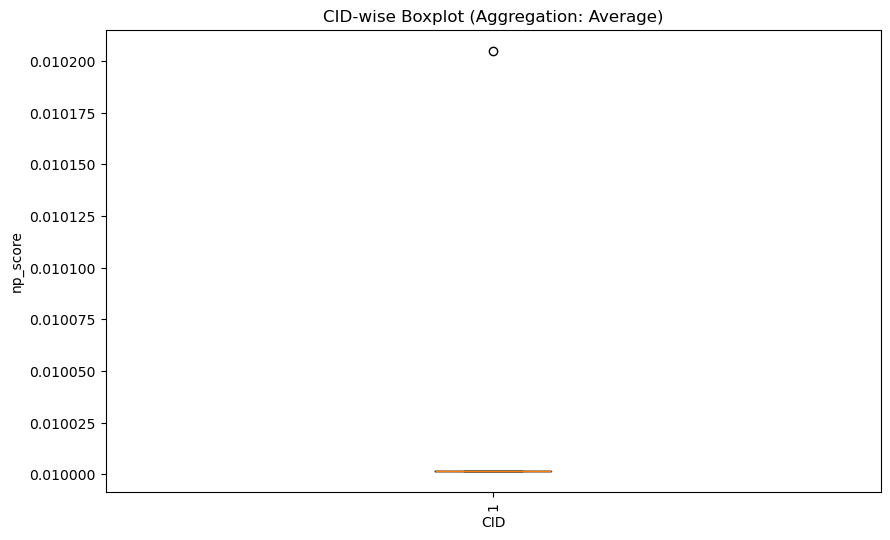

In [39]:
# CID별 np_score를 그룹화하고 평균(average) 계산
agg_data = sub_up_tdc.groupby('CID')['np_score'].mean().reset_index()

# CID별 데이터 포인트 개수 카운트
agg_data['count'] = sub_up_tdc.groupby('CID')['np_score'].count().values

# 최소 데이터 개수 기준 적용 (예: 최소 3개 이상의 데이터가 있는 CID만 선택)
cutoff = 3
filtered_data = agg_data[agg_data['count'] >= cutoff]

# np_score 값을 내림차순 정렬
filtered_data = filtered_data.sort_values(by='np_score', ascending=False)
filtered_data 

# Boxplot 생성
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data['np_score'])
plt.title("CID-wise Boxplot (Aggregation: Average)")
plt.xlabel('CID')
plt.ylabel('np_score')
plt.xticks(rotation=90)
plt.show()

In [23]:
# subacute_down_gene_np
# 두 번째 데이터에서 ID1 열을 CID로 변경
tdc_uniprot_gene = tdc_uniprot_gene.rename(columns={'ID1': 'CID'})

# gene 열을 기준으로 병합
merged_data = pd.merge(subacute_down_gene_np, tdc_uniprot_gene[['gene', 'CID']], on='gene', how='inner')

# 최종 결과: gene, CID, np_score
sub_down_tdc = merged_data[['gene', 'CID', 'np_score']]
sub_down_tdc

,gene,CID,np_score
0,Upp1,10376005,0.010000
1,Upp1,10020654,0.010000
2,Upp1,10355328,0.010000
3,Upp1,10105551,0.010000
4,Upp1,9998846,0.010000
...,...,...,...
878,Ptgs2,71625859,0.010001
879,Ptgs2,71625858,0.010001
880,Ptgs2,56929588,0.010001
881,Ptgs2,56929589,0.010001


In [24]:
sub_down_tdc.to_csv("/data1/project/eunyi/tbi/drug_gene/sub_down_tdc.csv", index=False)
sub_down_tdc

,gene,CID,np_score
0,Upp1,10376005,0.010000
1,Upp1,10020654,0.010000
2,Upp1,10355328,0.010000
3,Upp1,10105551,0.010000
4,Upp1,9998846,0.010000
...,...,...,...
878,Ptgs2,71625859,0.010001
879,Ptgs2,71625858,0.010001
880,Ptgs2,56929588,0.010001
881,Ptgs2,56929589,0.010001


In [25]:
# acute_up_gene_np
# 두 번째 데이터에서 ID1 열을 CID로 변경
tdc_uniprot_gene = tdc_uniprot_gene.rename(columns={'ID1': 'CID'})

# gene 열을 기준으로 병합
merged_data = pd.merge(acute_up_gene_np, tdc_uniprot_gene[['gene', 'CID']], on='gene', how='inner')

# 최종 결과: gene, CID, np_score
acu_up_tdc = merged_data[['gene', 'CID', 'np_score']]
acu_up_tdc

,gene,CID,np_score
0,Alox12,13600405,0.010015
1,Alox12,10736220,0.010015
2,Alox12,10594823,0.010015
3,Alox12,10714564,0.010015
4,Alox12,13600407,0.010015
...,...,...,...
802,Dpp4,68417894,0.010000
803,Dpp4,71460148,0.010000
804,Dpp4,71460149,0.010000
805,Acacb,72737641,0.010000


In [26]:
acu_up_tdc.to_csv("/data1/project/eunyi/tbi/drug_gene/acu_up_tdc.csv", index=False)
acu_up_tdc

,gene,CID,np_score
0,Alox12,13600405,0.010015
1,Alox12,10736220,0.010015
2,Alox12,10594823,0.010015
3,Alox12,10714564,0.010015
4,Alox12,13600407,0.010015
...,...,...,...
802,Dpp4,68417894,0.010000
803,Dpp4,71460148,0.010000
804,Dpp4,71460149,0.010000
805,Acacb,72737641,0.010000


In [27]:
# acute_down_gene_np
# 두 번째 데이터에서 ID1 열을 CID로 변경
tdc_uniprot_gene = tdc_uniprot_gene.rename(columns={'ID1': 'CID'})

# gene 열을 기준으로 병합
merged_data = pd.merge(acute_down_gene_np, tdc_uniprot_gene[['gene', 'CID']], on='gene', how='inner')

# 최종 결과: gene, CID, np_score
acu_down_tdc = merged_data[['gene', 'CID', 'np_score']]
acu_down_tdc

,gene,CID,np_score
0,Dbh,10398787,0.010009
1,Dbh,13815965,0.010009
2,Dbh,3442,0.010009
3,Dbh,10607740,0.010009
4,Dbh,667838,0.010009
...,...,...,...
995,Mapk11,57531245,0.010001
996,Mapk11,16749901,0.010001
997,Mapk11,16749900,0.010001
998,Mapk11,16749899,0.010001


In [28]:
acu_down_tdc.to_csv("/data1/project/eunyi/tbi/drug_gene/acu_down_tdc.csv", index=False)
acu_down_tdc

,gene,CID,np_score
0,Dbh,10398787,0.010009
1,Dbh,13815965,0.010009
2,Dbh,3442,0.010009
3,Dbh,10607740,0.010009
4,Dbh,667838,0.010009
...,...,...,...
995,Mapk11,57531245,0.010001
996,Mapk11,16749901,0.010001
997,Mapk11,16749900,0.010001
998,Mapk11,16749899,0.010001


In [7]:
def parse_uniprot_dat(file_path):
    uniprot_dict = {}
    with open(file_path, 'r') as f:
        entry = {}
        for line in f:
            if line.startswith('ID'):
                entry['uniprot_id'] = line.split()[1]
            elif line.startswith('GN'):
                if 'Name=' in line:
                    entry['gene_name'] = line.split('=')[1].split(';')[0]
            elif line.startswith('//'):
                if 'uniprot_id' in entry and 'gene_name' in entry:
                    uniprot_dict[entry['uniprot_id']] = entry['gene_name']
                entry = {}  # 다음 엔트리로 초기화
    return uniprot_dict

# UniProt 데이터 파싱
uniprot_file = '/data1/project/eunyi/tbi/drug_gene/uniprot_sprot.dat'  # 다운로드한 파일 경로
uniprot_mapping = parse_uniprot_dat(uniprot_file)

# UniProt 매핑 데이터를 DataFrame으로 변환
uniprot_df = pd.DataFrame(list(uniprot_mapping.items()), columns=['ID2', 'gene'])
uniprot_df

,ID2,gene
0,10D1B_MOUSE,Or10d1b {ECO:0000312|MGI:MGI:2660716}
1,10H28_MOUSE,Or10h28 {ECO:0000312|MGI:MGI:1335096}
2,10HGO_CATRO,10HGO
3,10P22_MOUSE,Or10p22 {ECO:0000312|MGI:MGI:107600}
4,1101L_ASFPP,MGF 110-1L {ECO:0000312|EMBL:CAN10356.1}
...,...,...
500532,Z_PIRVV,Z {ECO:0000255|HAMAP-Rule:MF_04087}
500533,Z_SABVB,Z {ECO:0000255|HAMAP-Rule:MF_04087}
500534,Z_TACVF,Z {ECO:0000255|HAMAP-Rule:MF_04087}
500535,Z_TAMVU,Z {ECO:0000255|HAMAP-Rule:MF_04087}


In [13]:
# tdc_data와 uniprot_df에서 ID2 값 확인
print(tdc_data['ID2'].head(10))  # tdc_data의 ID2 확인
print(uniprot_df['ID2'].head(10))  # uniprot_df의 ID2 확인


0    P08684
1    P51570
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
Name: ID2, dtype: object
0    10D1B_MOUSE
1    10H28_MOUSE
2    10HGO_CATRO
3    10P22_MOUSE
4    1101L_ASFPP
5    1102L_ASFPP
6    1104L_ASFPP
7    1105L_ASFPP
8      11K_PAVHV
9     11S3_HELAN
Name: ID2, dtype: object


In [3]:
# 'gene' 열에서 유전자 이름만 남기기 (메타데이터 제거)
uniprot_df['gene'] = uniprot_df['gene'].str.split(' {').str[0]

# 결과 확인
uniprot_df.to_csv("/data1/project/eunyi/tbi/drug_gene/uniprot_gene.csv", index=False)
uniprot_df

NameError: name 'uniprot_df' is not defined

In [7]:
uniprot_df = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/uniprot_gene.csv")
uniprot_df

,ID2,gene
0,10D1B_MOUSE,Or10d1b
1,10H28_MOUSE,Or10h28
2,10HGO_CATRO,10HGO
3,10P22_MOUSE,Or10p22
4,1101L_ASFPP,MGF 110-1L
...,...,...
500532,Z_PIRVV,Z
500533,Z_SABVB,Z
500534,Z_TACVF,Z
500535,Z_TAMVU,Z


In [10]:
# 모든 ID2 값을 대문자로 통일
tdc_data['ID2'] = tdc_data['ID2'].str.upper()
uniprot_df['ID2'] = uniprot_df['ID2'].str.upper()
# 양쪽에 있는 공백 제거
tdc_data['ID2'] = tdc_data['ID2'].str.strip()
uniprot_df['ID2'] = uniprot_df['ID2'].str.strip()

In [11]:
# 다시 병합 시도
merged_data = pd.merge(tdc_data, uniprot_df, on='ID2', how='left')

# 결과 확인
print(merged_data[['ID2', 'gene']].head())


      ID2 gene
0  P08684  NaN
1  P51570  NaN
2     NaN  NaN
3     NaN  NaN
4     NaN  NaN


In [12]:
# tdc_data의 ID2가 uniprot_df의 ID2와 일치하는지 확인
matched = tdc_data['ID2'].isin(uniprot_df['ID2']).sum()
print(f"매칭된 ID2의 수: {matched} / {len(tdc_data)}")


매칭된 ID2의 수: 0 / 1072931


In [8]:
# tdc_data와 uniprot_df를 ID2 열 기준으로 병합
merged_data = pd.merge(tdc_data, uniprot_df, on='ID2', how='left')

# 결과 확인
print(merged_data.head())


          ID1                                                 X1     ID2  \
0  71463198.0  Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...  P08684   
1  44640149.0  O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...  P51570   
2     65023.0  CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...     NaN   
3    461984.0  CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...     NaN   
4    461988.0  COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...     NaN   

                                                  X2        Y gene  
0  MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...  50000.0  NaN  
1  MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...   6676.9  NaN  
2  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...      8.5  NaN  
3  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...    177.0  NaN  
4  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...    164.0  NaN  


In [7]:
# 두 데이터프레임을 ID2 열을 기준으로 병합 (left join)
merged_data = pd.merge(tdc_data, uniprot_df, on='ID2', how='left')

# 결과 확인
print(merged_data.head())

# 병합된 결과를 CSV 파일로 저장 (선택사항)
merged_data.to_csv("/data1/project/eunyi/tbi/drug_gene/tdc_gene.csv", index=False)
merged_data

          ID1                                                 X1     ID2  \
0  71463198.0  Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...  P08684   
1  44640149.0  O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...  P51570   
2     65023.0  CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...     NaN   
3    461984.0  CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...     NaN   
4    461988.0  COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...     NaN   

                                                  X2        Y gene  
0  MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...  50000.0  NaN  
1  MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...   6676.9  NaN  
2  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...      8.5  NaN  
3  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...    177.0  NaN  
4  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...    164.0  NaN  


,ID1,X1,ID2,X2,Y,gene
0,71463198.0,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,NaN
1,44640149.0,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,NaN
2,65023.0,CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,8.5,NaN
3,461984.0,CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,177.0,NaN
4,461988.0,COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,164.0,NaN
...,...,...,...,...,...,...
1072926,76336413.0,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,NaN
1072927,76311049.0,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,NaN
1072928,76321936.0,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,NaN
1072929,76329133.0,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,NaN


In [5]:
tdc_gene = pd.read_csv("/data1/project/eunyi/tbi/drug_gene/tdc_gene.csv")
tdc_gene

,ID1,X1,ID2,X2,Y,gene
0,71463198.0,Cc1nc(CN2CCN(c3c(Cl)cnc4[nH]c(-c5cn(C)nc5C)nc3...,P08684,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,50000.0,NaN
1,44640149.0,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,P51570,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...,6676.9,NaN
2,65023.0,CC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,8.5,NaN
3,461984.0,CCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,177.0,NaN
4,461988.0,COCCOC(=O)N[C@H](C(=O)N[C@@H](Cc1ccccc1)[C@@H]...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,164.0,NaN
...,...,...,...,...,...,...
1072926,76336413.0,COc1ccc2c(c1)oc1cccc(CNCc3ccccc3)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18100.0,NaN
1072927,76311049.0,CC(C)NCc1cccc2oc3cc(O)ccc3c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,18360.0,NaN
1072928,76321936.0,COc1ccc2c(c1)oc1cccc(CN(C(=O)CCO[N+](=O)[O-])C...,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,14300.0,NaN
1072929,76329133.0,COc1ccc2c(c1)[nH]c1cccc(CNC(C)C)c12,P81908,EEDIIITTKNGKVRGMNLPVLGGTVTAFLGIPYAQPPLGRLRFKKP...,10080.0,NaN


In [6]:
# gene 열의 NaN 값 개수 세기
nan_count = tdc_gene['gene'].isna().sum()

# NaN 개수 출력
print(f"gene 열의 NaN 값 개수: {nan_count}")


gene 열의 NaN 값 개수: 1072931
